## Librerias

In [1]:
import pandas as pd

from tqdm import tqdm as tqdm
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sn
import seaborn as sns
from sklearn.decomposition import PCA

from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Funciones

In [ ]:
def moving_average(df, n):
  MA = pd.Series(df['Close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
  MA = pd.DataFrame(MA)
  MA = pd.concat([MA.loc[1], MA])
  MA = MA.reset_index()
  MA = MA.drop([0,'index'], axis=1)
  df = df.join(MA)
  return df

In [ ]:
def exponential_moving_average(df, n):
  EMA = pd.Series(df['Close'].ewm(span=n, min_periods=n).mean(), name="EMA_" + str(n))
  EMA = pd.DataFrame(EMA)
  EMA = pd.concat([EMA.loc[1], EMA])
  EMA = EMA.reset_index()
  EMA = EMA.drop([0,'index'], axis=1)
  df = df.join(EMA)
  return df

In [ ]:
def momentum(df, n):
  M = pd.Series(df['Close'].diff(n), name="Momentum_"+str(n))
  M = pd.DataFrame(M)
  M = pd.concat([M.loc[1], M])
  M = M.reset_index()
  M = M.drop([0,'index'], axis=1)
  df = df.join(M)
  return df

In [ ]:
def bollinger_bands(df, n):
  MA = pd.Series(df['Close'].rolling(n, min_periods=n).mean())
  MSD = pd.Series(df['Close'].rolling(n, min_periods=n).std())
  b1 = 4 * MSD / MA
  B1 = pd.Series(b1, name = "BollingerB_" + str(n))
  B1 = pd.DataFrame(B1)
  B1 = pd.concat([B1.loc[1], B1])
  B1 = B1.reset_index()
  B1 = B1.drop([0,'index'], axis=1)
  df = df.join(B1)
  b2 = (df['Close'] - MA  + 2 * MSD) / (4 * MSD)
  B2 = pd.Series(b2, name='Bollinger%b_'+str(n))
  B2 = pd.DataFrame(B2)
  B2 = pd.concat([B2.loc[1], B2])
  B2 = B2.reset_index()
  B2 = B2.drop([0,'index'], axis=1)
  df = df.join(B2)
  return df

In [ ]:
def stochastic_oscillator(df ,n):
  S0K = pd.Series((df['Close']- df['Low']) / (df['High']-df['Low']), name='S0k_' + str(n))
  S0K = pd.DataFrame(S0K)
  S0K = pd.concat([S0K.loc[1], S0K])
  S0K = S0K.reset_index()
  S0K = S0K.drop([0,'index'], axis=1)
  df = df.join(S0K)
  return df

In [ ]:
def relative_strength_index(df, n):
  i = 0
  UpI = [0]
  DoI = [0]

  while i + 1 <= df.index[-1]:
    UpMove = df.loc[i+1, 'High'] - df.loc[i, 'High']
    DoMove = df.loc[i+1, 'Low'] - df.loc[i, 'Low']
    if UpMove > DoMove and UpMove > 0:
      UpD = UpMove
    else:
      UpD = 0
    UpI.append(UpD)
    if DoMove > UpMove and DoMove > 0:
      DoD = DoMove
    else:
      DoD = 0
    DoI.append(DoD)
    i = i + 1

  UpI = pd.Series(UpI)
  DoI = pd.Series(DoI)
  PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean())
  NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean())
  RSI = pd.Series(PosDI / (PosDI + NegDI), name='RSI_' + str(n))
  RSI = pd.DataFrame(RSI)
  RSI = pd.concat([RSI.loc[1], RSI])
  RSI = RSI.reset_index()
  RSI = RSI.drop([0,'index'], axis=1)
  df = df.join(RSI)
  return df

In [ ]:
def common_channel_index(df, n):
  PP = (df['High'] + df['Low'] + df['Close']) / 3
  CCI = pd.Series((PP - PP.rolling(n, min_periods=n).mean()) / PP.rolling(n, min_periods=n).std(), name='CCI_' + str(n))
  CCI = pd.DataFrame(CCI)
  CCI = pd.concat([CCI.loc[1], CCI])
  CCI = CCI.reset_index()
  CCI = CCI.drop([0,'index'], axis=1)
  df = df.join(CCI)
  return df

In [ ]:
def standart_deviation(df, n):
  hola = pd.Series(df['Close'].rolling(n, min_periods=n).std(), name='STD_' + str(n))
  hola = pd.DataFrame(hola)
  hola = pd.concat([hola.loc[1], hola])
  hola = hola.reset_index()
  hola = hola.drop([0,'index'], axis=1)
  df.join(hola)
  return df

## Dataframe

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/20rd1/dataproject3/main/notebook/data/df_V3.csv')

In [ ]:
df

Unnamed: 0  Unnamed: 0.1   Open Time  ...   CCI_300      PIB       CPI
0              0             0  2015-10-11  ...  0.000000  54420.0 -0.044968
1              1             1  2015-10-12  ...  0.000000  54420.0 -0.044968
2              2             2  2015-10-13  ...  0.000000  54420.0 -0.044968
3              3             3  2015-10-14  ...  0.000000  54420.0 -0.044968
4              4             4  2015-10-15  ...  0.000000  54420.0 -0.044968
...          ...           ...         ...  ...       ...      ...       ...
2014        2014          2014  2021-04-16  ...  2.155158  56812.0  0.547438
2015        2015          2015  2021-04-17  ...  2.054954  56812.0  0.547438
2016        2016          2016  2021-04-18  ...  1.982619  56812.0  0.547438
2017        2017          2017  2021-04-19  ...  1.695163  56812.0  0.547438
2018        2018          2018  2021-04-20  ...  1.677126  56812.0  0.547438

[2019 rows x 108 columns]

In [ ]:
df2 = df.drop(['Open','Unnamed: 0.1','High','Low','Unnamed: 0'], axis=1)

In [ ]:
df2['fecha'] = pd.to_datetime(df['Open Time'])

In [ ]:
df2

Open Time     Close         Volume  ...      PIB       CPI      fecha
0     2015-10-11    249.50    3021.120000  ...  54420.0 -0.044968 2015-10-11
1     2015-10-12    247.60    9493.890000  ...  54420.0 -0.044968 2015-10-12
2     2015-10-13    250.00   12875.400000  ...  54420.0 -0.044968 2015-10-13
3     2015-10-14    253.00   30115.770000  ...  54420.0 -0.044968 2015-10-14
4     2015-10-15    255.26   50535.450000  ...  54420.0 -0.044968 2015-10-15
...          ...       ...            ...  ...      ...       ...        ...
2014  2021-04-16  61334.80   91764.139884  ...  56812.0  0.547438 2021-04-16
2015  2021-04-17  60006.66   58912.256128  ...  56812.0  0.547438 2021-04-17
2016  2021-04-18  56150.01  124882.131824  ...  56812.0  0.547438 2021-04-18
2017  2021-04-19  55633.14   78229.042267  ...  56812.0  0.547438 2021-04-19
2018  2021-04-20  56566.46   60500.152593  ...  56812.0  0.547438 2021-04-20

[2019 rows x 104 columns]

In [ ]:
df2['dayofweek'] = df2['fecha'].dt.dayofweek
df2['quarter'] = df2['fecha'].dt.quarter
df2['month'] = df2['fecha'].dt.month
df2['year'] = df2['fecha'].dt.year
df2['dayofyear'] = df2['fecha'].dt.dayofyear
df2['dayofmonth'] = df2['fecha'].dt.day
df2['weekofyear'] = df2['fecha'].dt.weekofyear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [ ]:
df2 = df2.drop(['Open Time','fecha'], axis=1)

In [ ]:
df2

Close         Volume  ...  dayofmonth  weekofyear
0       249.50    3021.120000  ...          11          41
1       247.60    9493.890000  ...          12          42
2       250.00   12875.400000  ...          13          42
3       253.00   30115.770000  ...          14          42
4       255.26   50535.450000  ...          15          42
...        ...            ...  ...         ...         ...
2014  61334.80   91764.139884  ...          16          15
2015  60006.66   58912.256128  ...          17          15
2016  56150.01  124882.131824  ...          18          15
2017  55633.14   78229.042267  ...          19          16
2018  56566.46   60500.152593  ...          20          16

[2019 rows x 109 columns]

# Separar para evaluar

## Primeras 10

In [ ]:
primeras10 = df2.iloc[:, 0:10] 

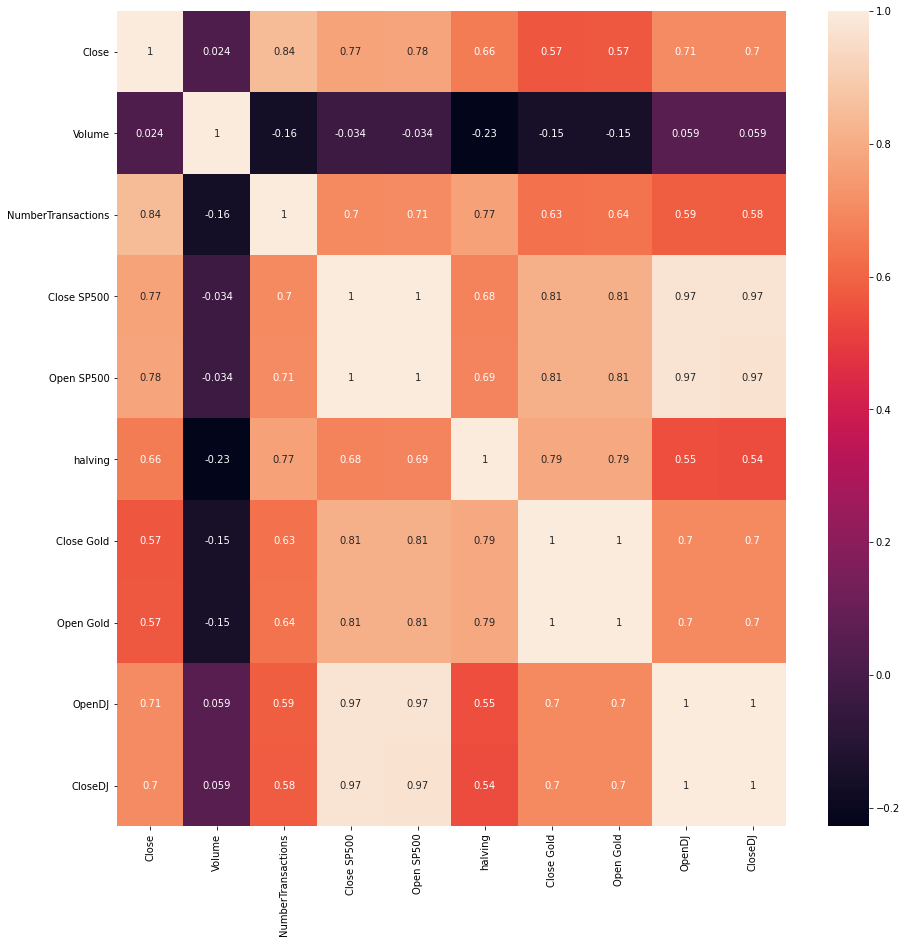

In [ ]:
corrMatrix = primeras10.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
primeras10 = primeras10.drop(['Volume','Open Gold'], axis=1)

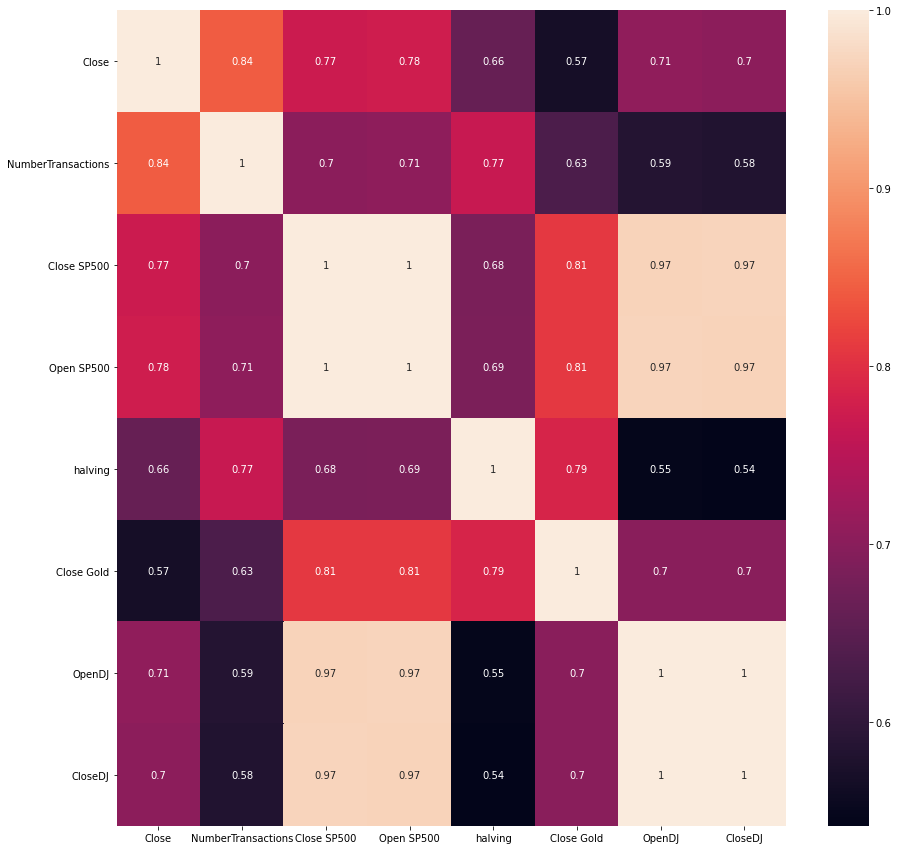

In [ ]:
corrMatrix = primeras10.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 10:20

In [ ]:
primeras20 = df2.iloc[:, 10:20] 

In [ ]:
primeras20['Close'] = df2.iloc[:,0]

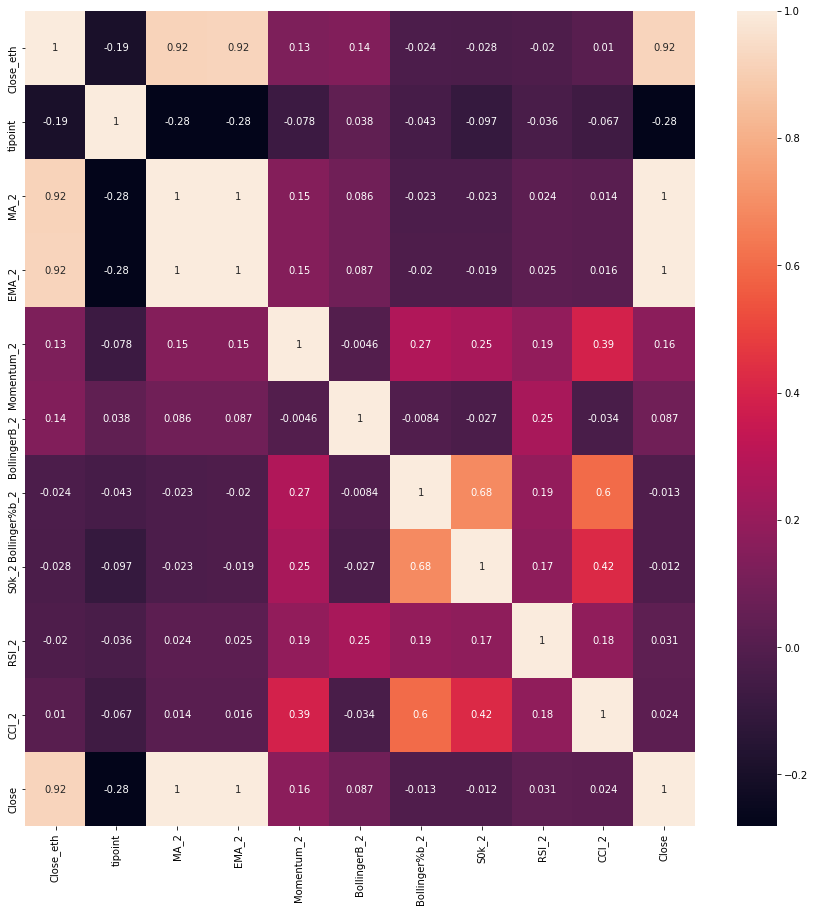

In [ ]:
corrMatrix = primeras20.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
primeras20 = primeras20.drop(['tipoint','Momentum_2','BollingerB_2','Bollinger%b_2','S0k_2','RSI_2','CCI_2'], axis=1)

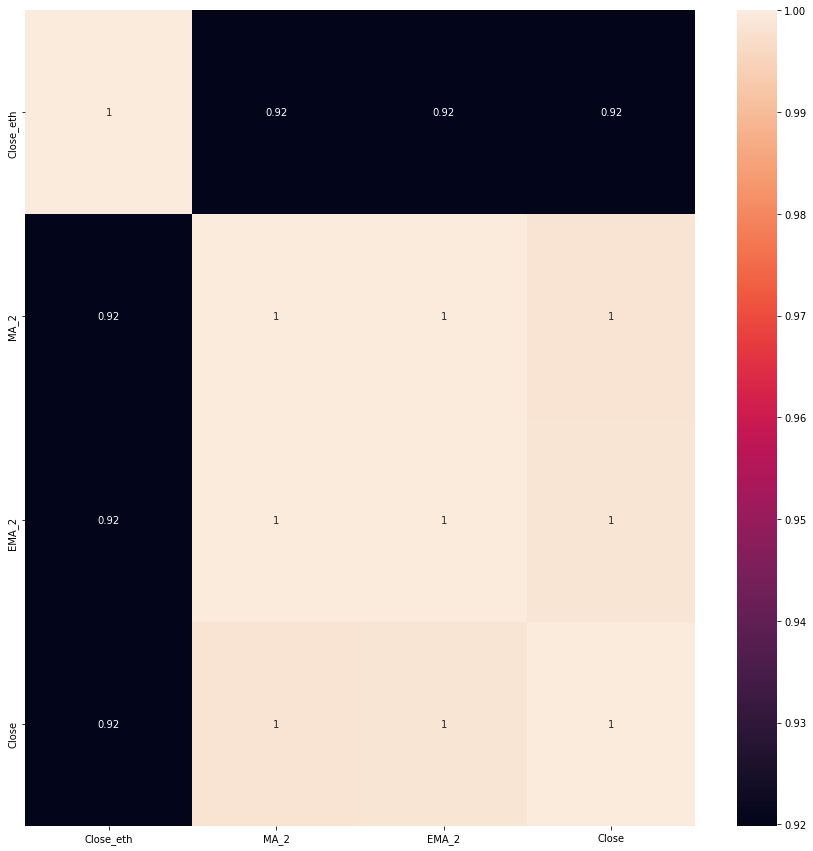

In [ ]:
corrMatrix = primeras20.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 20:30

In [ ]:
primeras30 = df2.iloc[:, 20:30]

In [ ]:
primeras30['Close'] = df2.iloc[:,0]

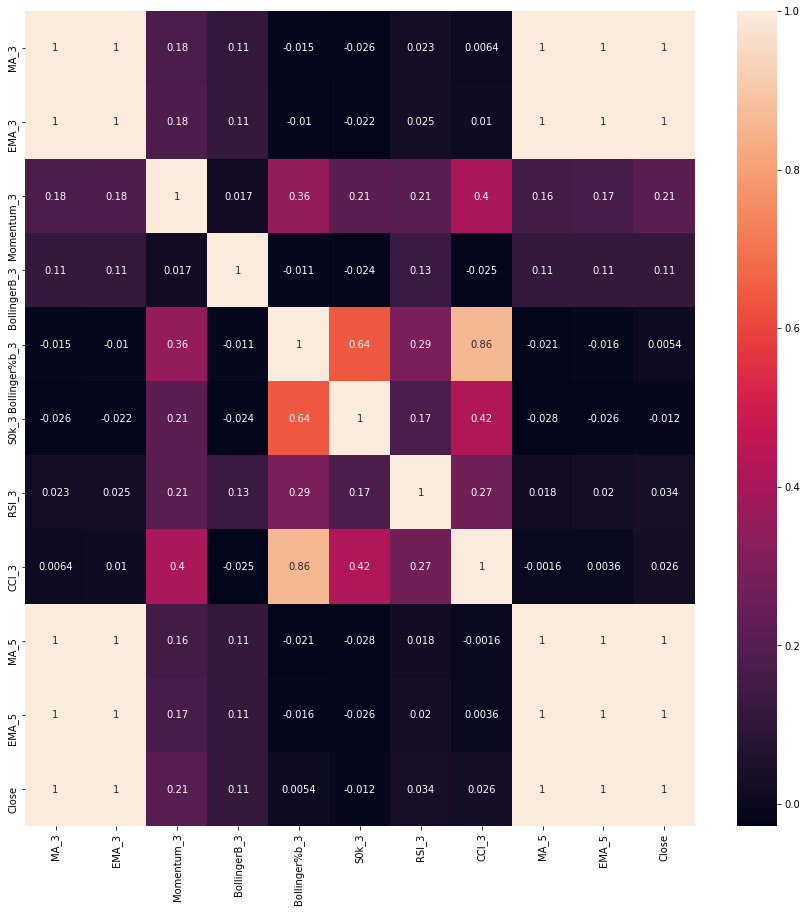

In [ ]:
corrMatrix = primeras30.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
list(primeras30)

['MA_3',
 'EMA_3',
 'Momentum_3',
 'BollingerB_3',
 'Bollinger%b_3',
 'S0k_3',
 'RSI_3',
 'CCI_3',
 'MA_5',
 'EMA_5',
 'Close']

In [ ]:
primeras30 = primeras30.drop(['Momentum_3','BollingerB_3','S0k_3','RSI_3','CCI_3','Bollinger%b_3'], axis=1)

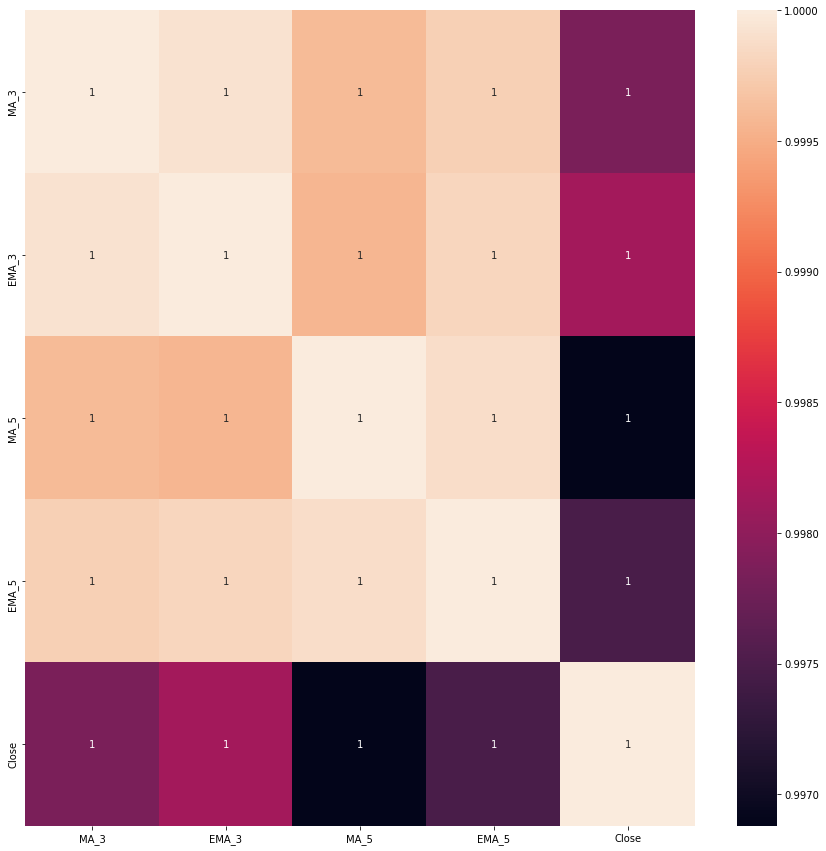

In [ ]:
corrMatrix = primeras30.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 30:40

In [ ]:
primeras40 = df2.iloc[:, 30:40]

In [ ]:
primeras40['Close'] = df2.iloc[:,0]

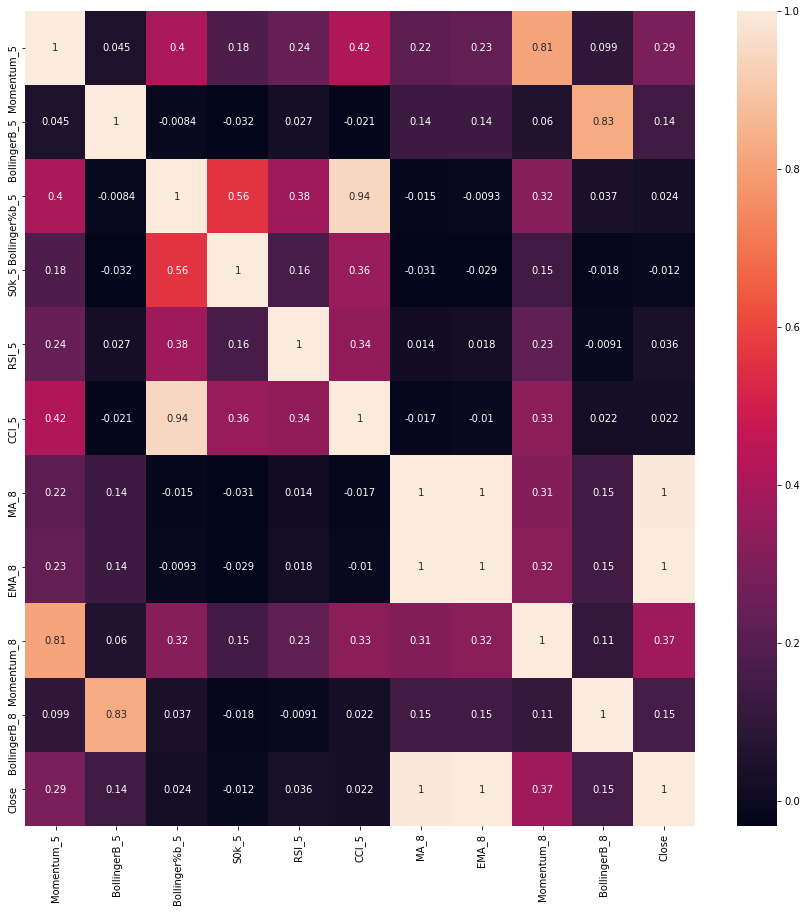

In [ ]:
corrMatrix = primeras40.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
primeras40 = primeras40.drop(['Momentum_5','BollingerB_5','Bollinger%b_5','S0k_5','RSI_5','CCI_5','Momentum_8','BollingerB_8'], axis=1)

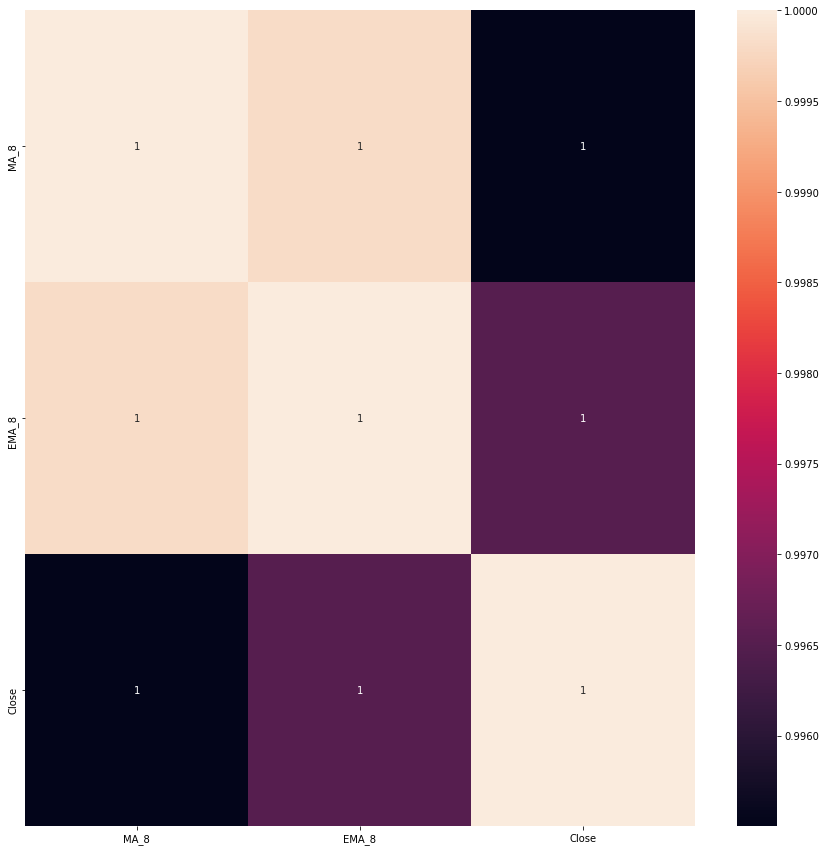

In [ ]:
corrMatrix = primeras40.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 50:60

In [ ]:
primeras50 = df2.iloc[:, 50:60]

In [ ]:
primeras50['Close'] = df2.iloc[:,0]

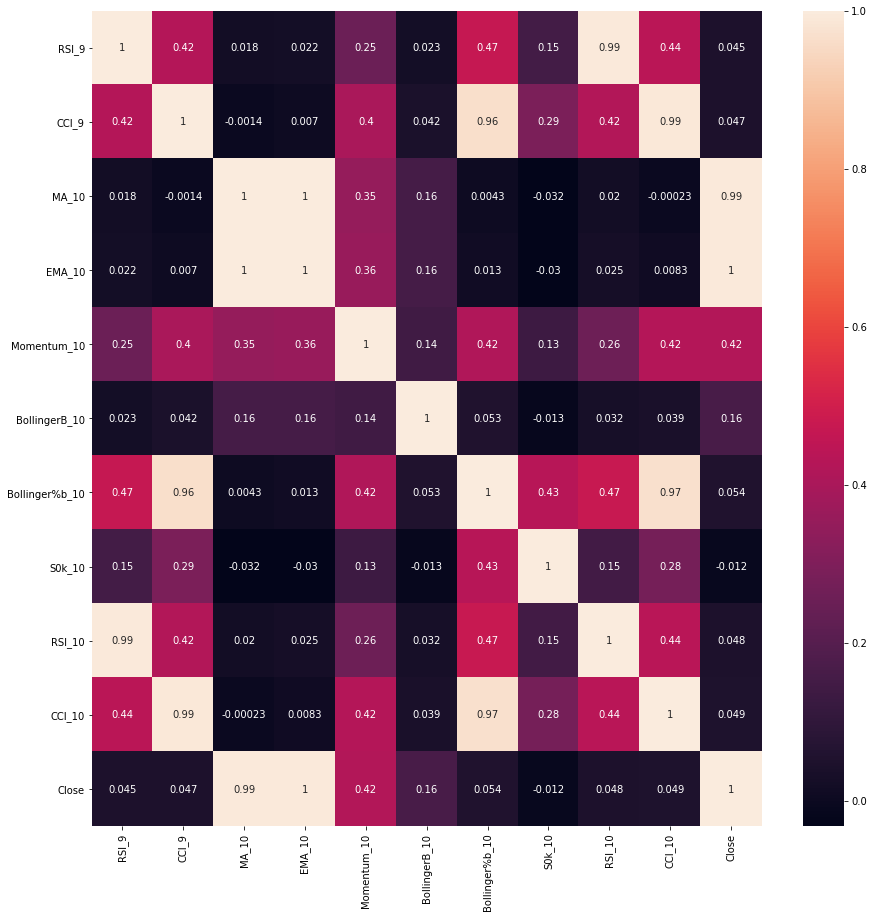

In [ ]:
corrMatrix = primeras50.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
primeras50 = primeras50.drop(['RSI_9','CCI_9','Momentum_10','BollingerB_10','Bollinger%b_10','S0k_10','RSI_10','CCI_10'], axis=1)

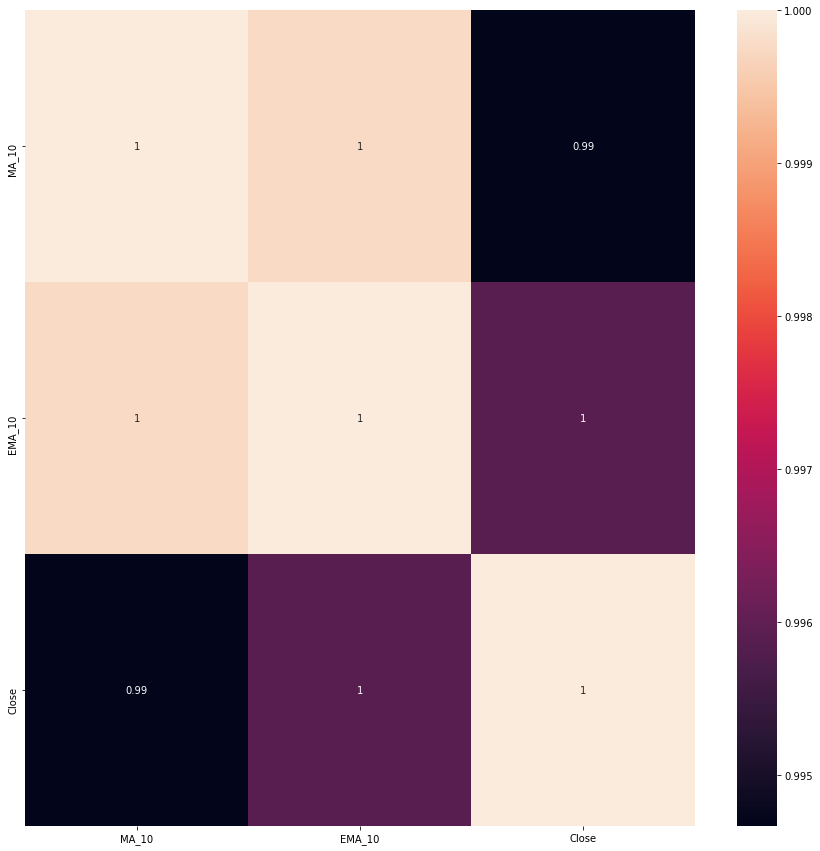

In [ ]:
corrMatrix = primeras50.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 40:50

In [ ]:
primeras60 = df2.iloc[:, 40:50]

In [ ]:
primeras60['Close'] = df2.iloc[:,0]

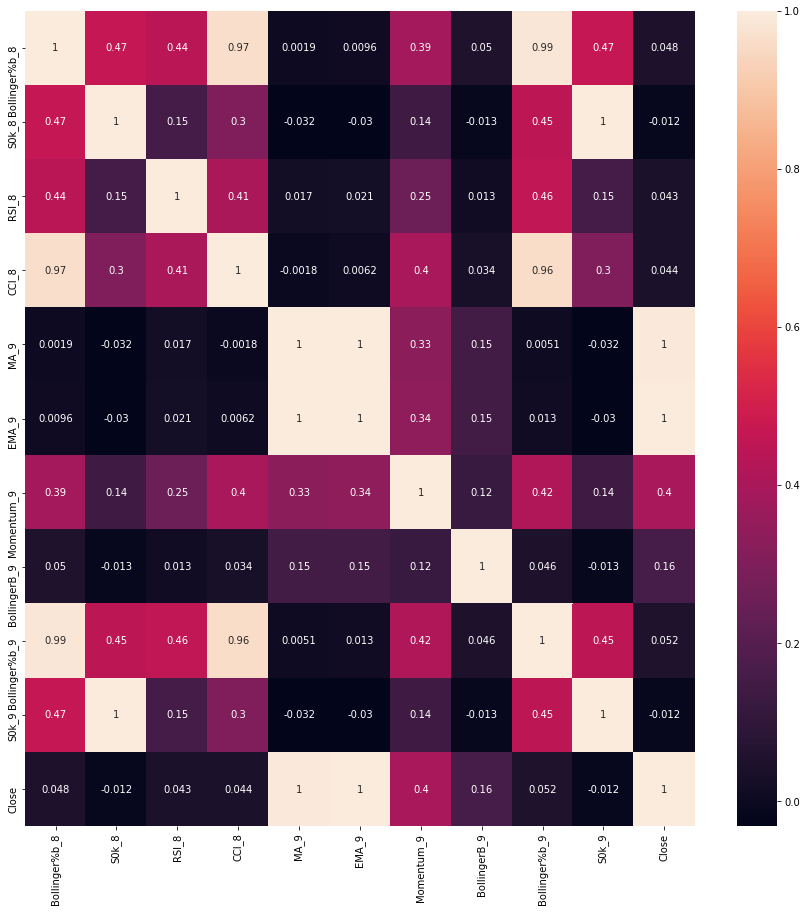

In [ ]:
corrMatrix = primeras60.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
primeras60 = primeras60.drop(['Bollinger%b_8','S0k_8','RSI_8','CCI_8','Momentum_9','BollingerB_9','S0k_9','Bollinger%b_9'], axis=1)

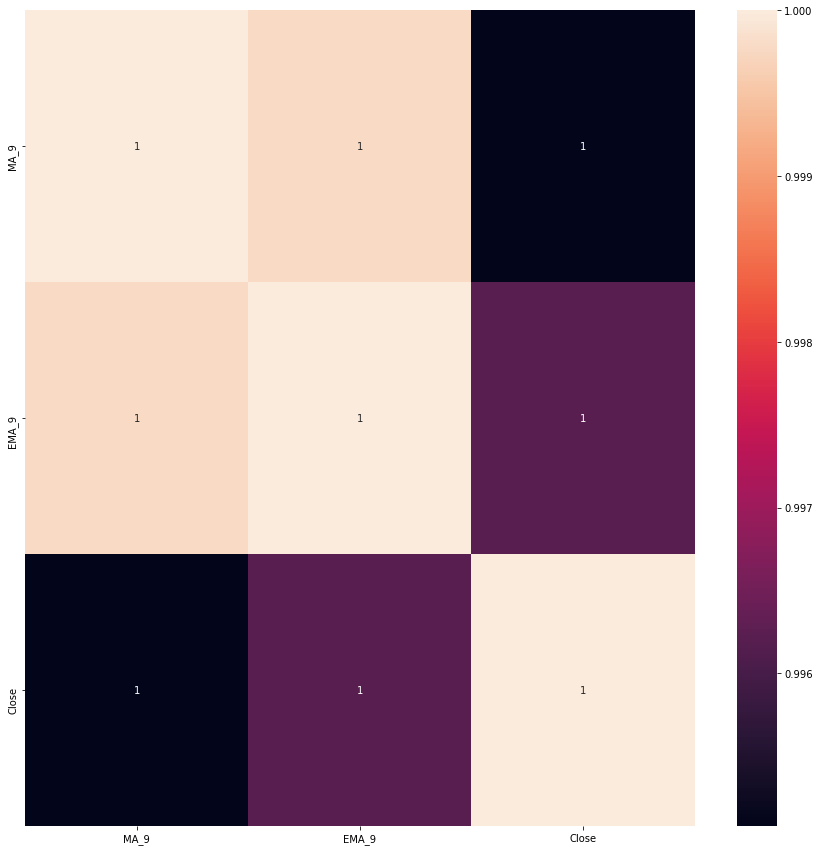

In [ ]:
corrMatrix = primeras60.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 60:70

In [ ]:
primeras70 = df2.iloc[:, 60:70]

In [ ]:
primeras70['Close'] = df2.iloc[:,0]

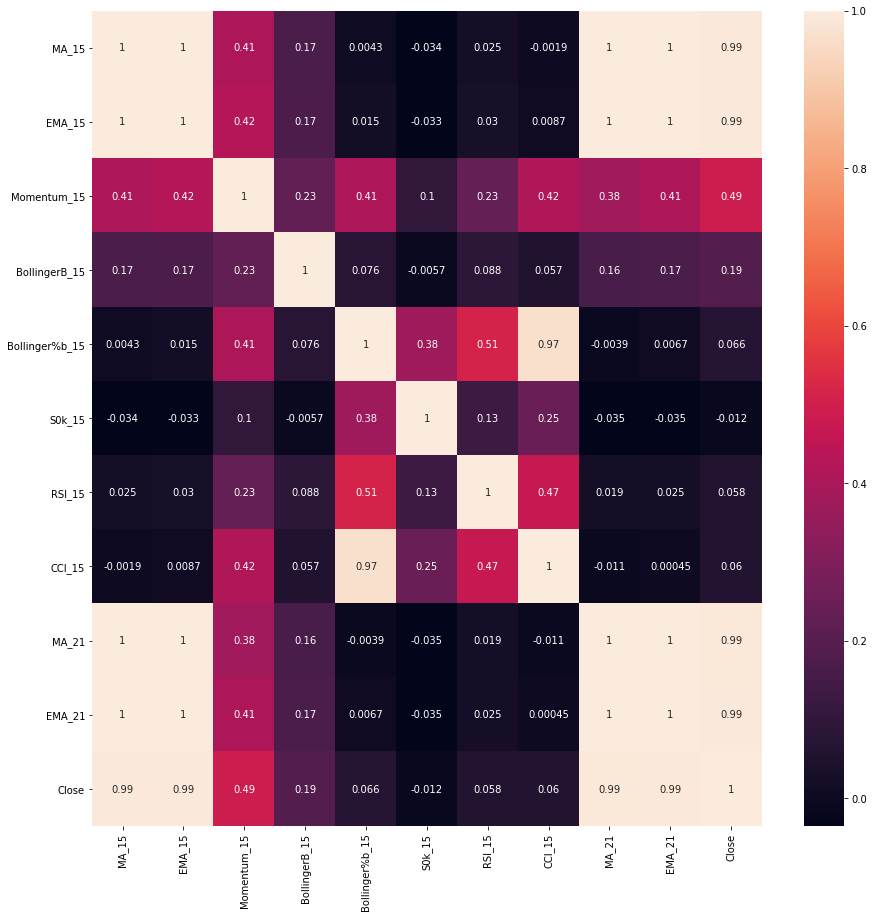

In [ ]:
corrMatrix = primeras70.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
primeras70 = primeras70.drop(['BollingerB_15','Bollinger%b_15','S0k_15','RSI_15','CCI_15'], axis=1)

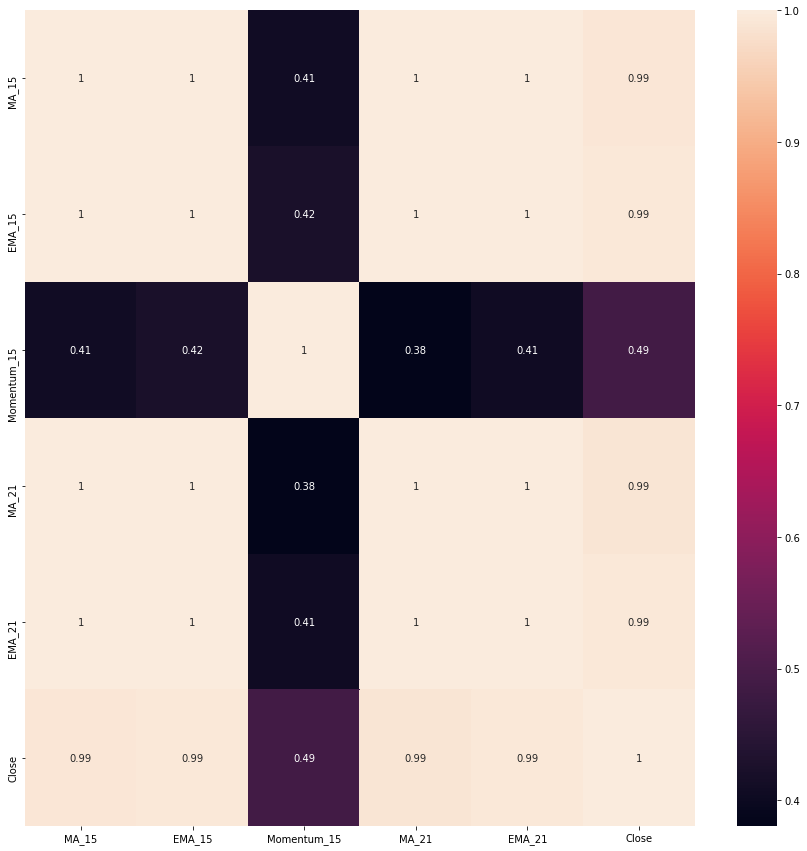

In [ ]:
corrMatrix = primeras70.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 70:80

In [ ]:
primeras80 = df2.iloc[:, 70:80]

In [ ]:
primeras80['Close'] = df2.iloc[:,0]

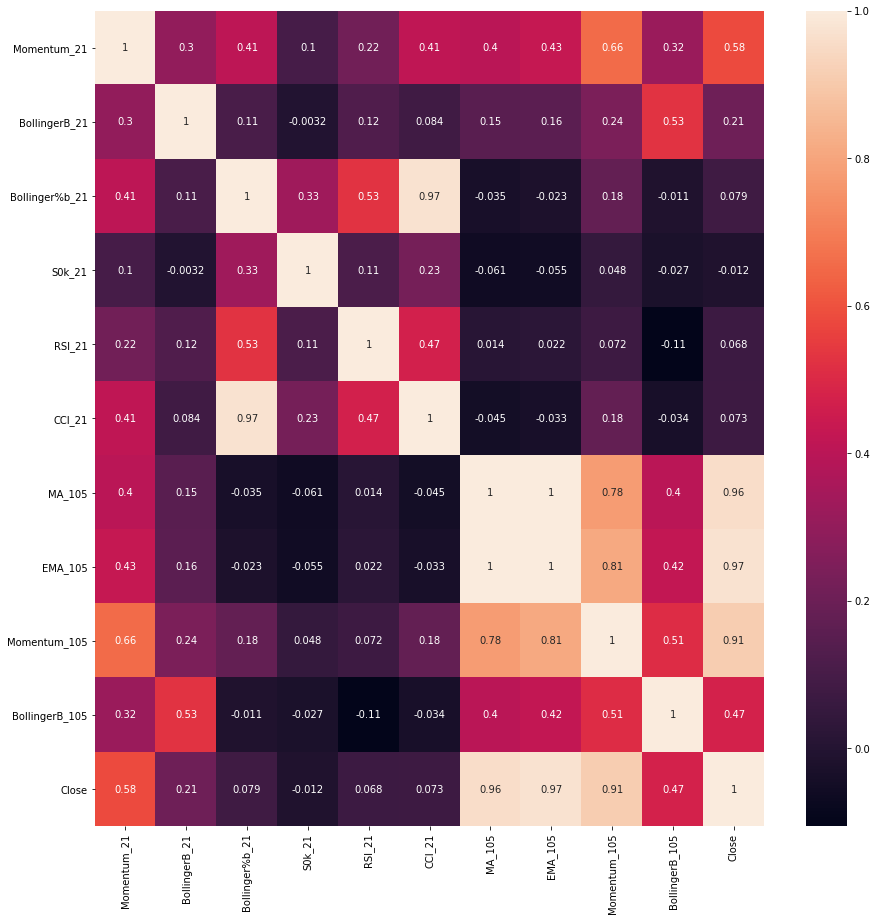

In [ ]:
corrMatrix = primeras80.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
primeras80 = primeras80.drop(['BollingerB_21','Bollinger%b_21','S0k_21','RSI_21','CCI_21'], axis=1)

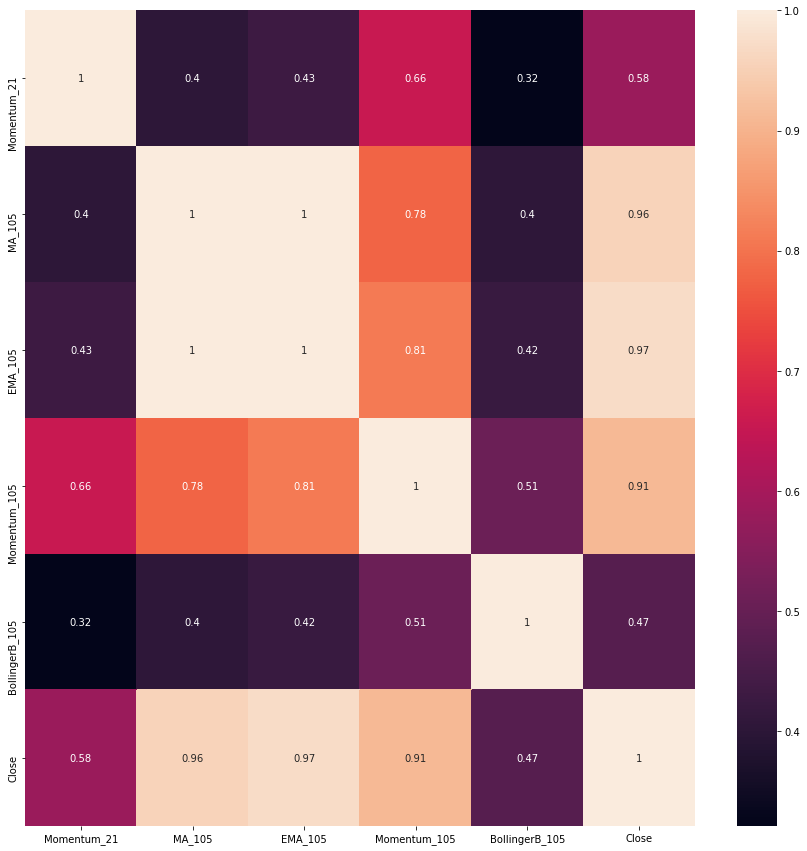

In [ ]:
corrMatrix = primeras80.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 80:90

In [ ]:
primeras90 = df2.iloc[:, 80:90]

In [ ]:
primeras90['Close'] = df2.iloc[:,0]

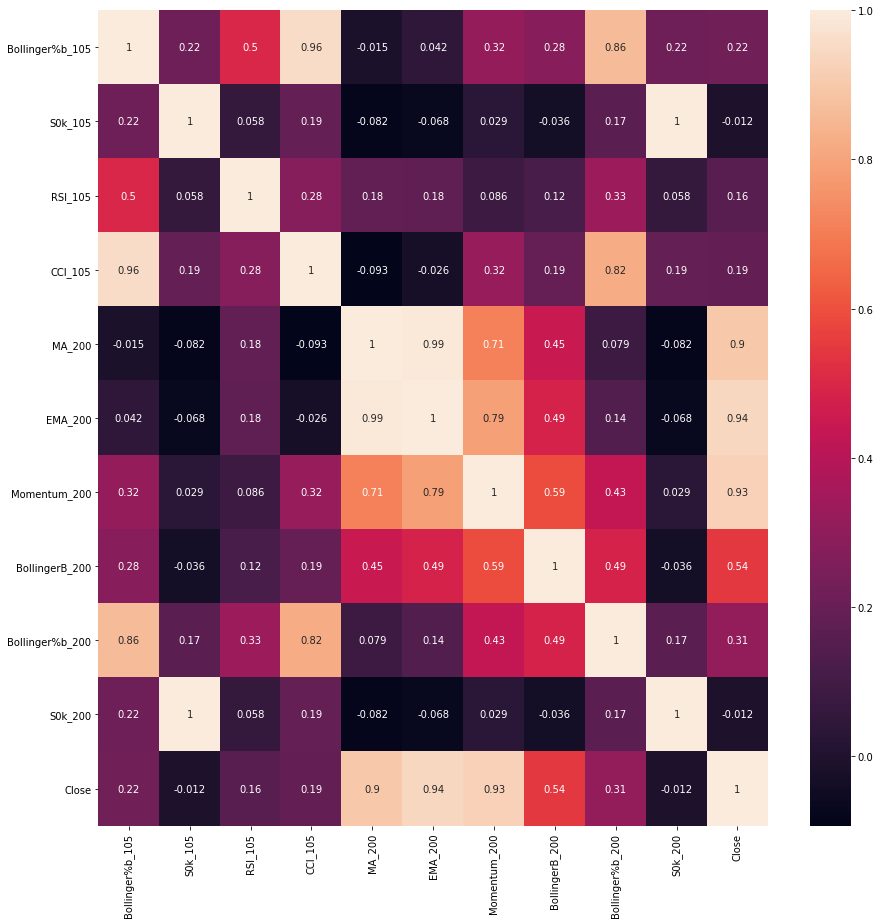

In [ ]:
corrMatrix = primeras90.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
primeras90 = primeras90.drop(['Bollinger%b_105','S0k_105','RSI_105','CCI_105','Bollinger%b_200','S0k_200'], axis=1)

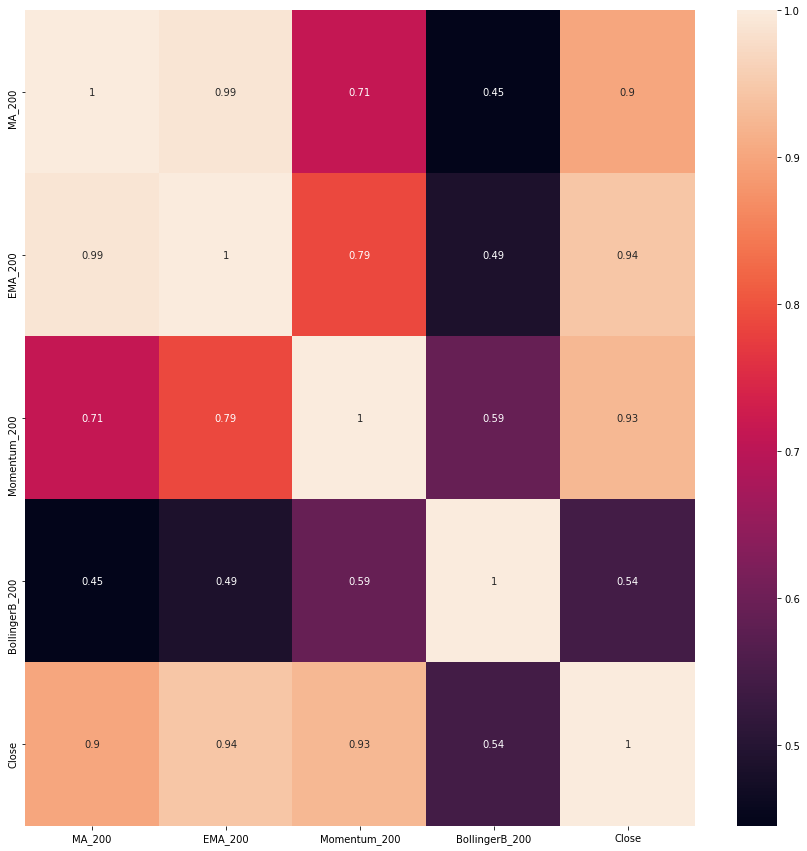

In [ ]:
corrMatrix = primeras90.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 90:100

In [ ]:
primeras100 = df2.iloc[:, 90:100]

In [ ]:
primeras100['Close'] = df2.iloc[:,0]

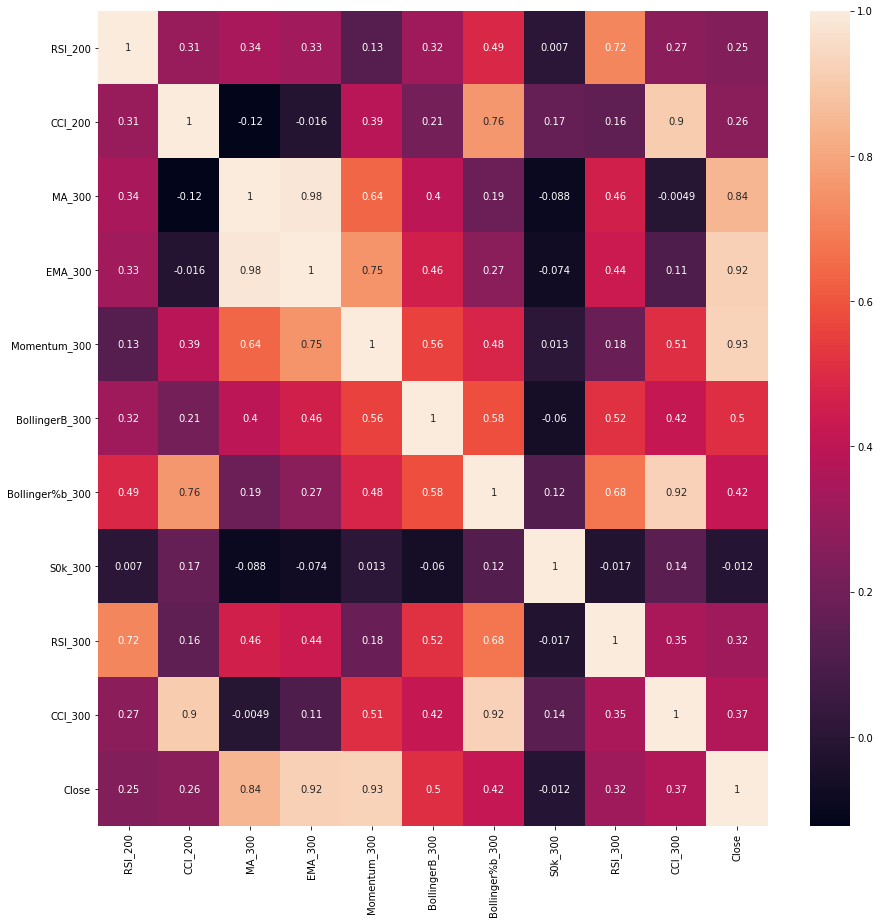

In [ ]:
corrMatrix = primeras100.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
primeras100 = primeras100.drop(['RSI_200','CCI_200','Bollinger%b_300','S0k_300','RSI_300','CCI_300'], axis=1)

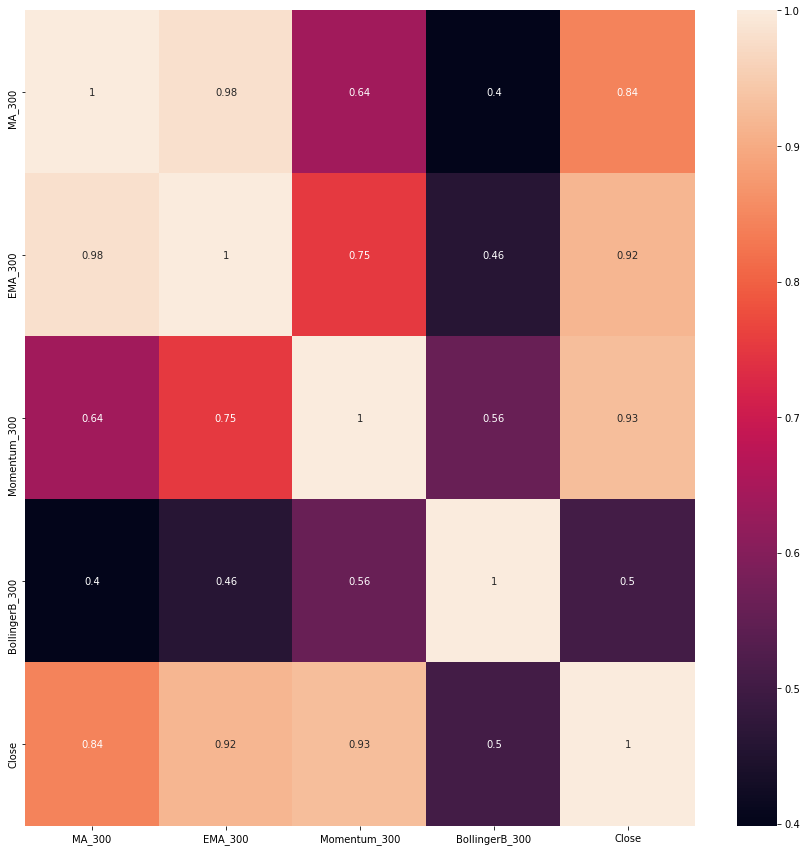

In [ ]:
corrMatrix = primeras100.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 100:110

In [ ]:
primeras110 = df2.iloc[:, 100:110]

In [ ]:
primeras110['Close'] = df2.iloc[:,0]

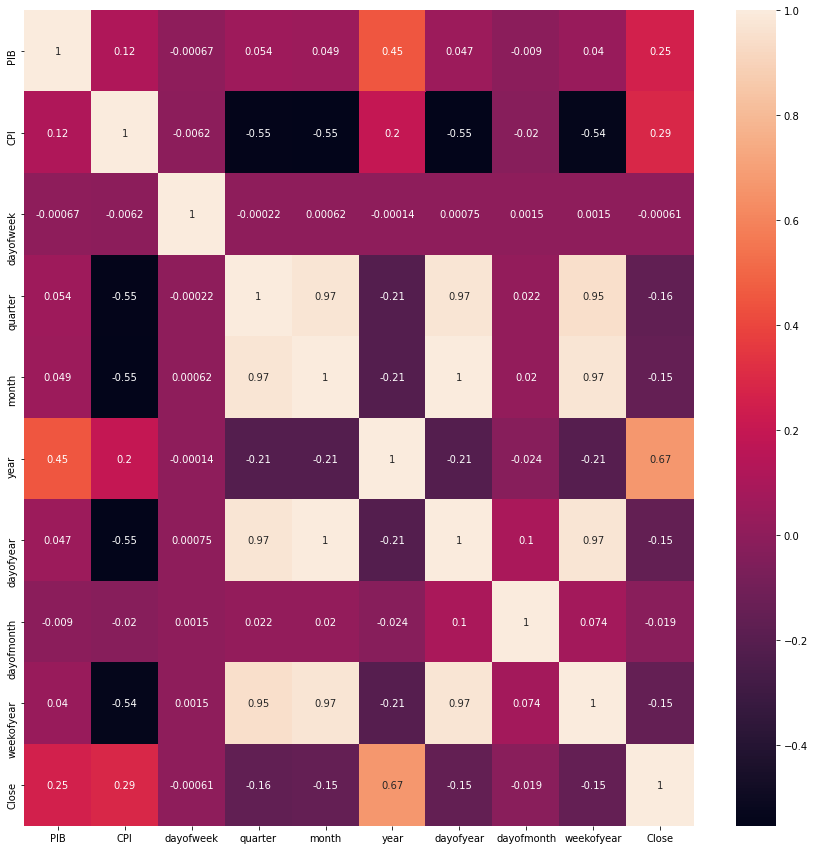

In [ ]:
corrMatrix = primeras110.corr()
plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
df2 = df2.drop(['Open SP500','Open Gold','Open SP500'], axis=1)

In [ ]:
df2 = df2.drop(['Volume','Open Gold','Open SP500','Open Gold','Open SP500'], axis=1)

KeyError: ignored

In [ ]:
df2 = df2.drop(['tipoint','Momentum_2','BollingerB_2','Bollinger%b_2','S0k_2','RSI_2','CCI_2'], axis=1)

In [ ]:
df2 = df2.drop(['Momentum_3','BollingerB_3','S0k_3','RSI_3','CCI_3','Bollinger%b_3'], axis=1)

In [ ]:
df2 = df2.drop(['Momentum_5','BollingerB_5','Bollinger%b_5','S0k_5','RSI_5','CCI_5','Momentum_8','BollingerB_8'], axis=1)

In [ ]:
df2 = df2.drop(['RSI_9','CCI_9','Momentum_10','BollingerB_10','Bollinger%b_10','S0k_10','RSI_10','CCI_10'], axis=1)

In [ ]:
df2 = df2.drop(['Bollinger%b_8','S0k_8','RSI_8','CCI_8','Momentum_9','BollingerB_9','S0k_9','Bollinger%b_9'], axis=1)

In [ ]:
df2 = df2.drop(['BollingerB_15','Bollinger%b_15','S0k_15','RSI_15','CCI_15'], axis=1)

In [ ]:
df2 = df2.drop(['BollingerB_21','Bollinger%b_21','S0k_21','RSI_21','CCI_21'], axis=1)

In [ ]:
df2 = df2.drop(['Bollinger%b_105','S0k_105','RSI_105','CCI_105','Bollinger%b_200','S0k_200'], axis=1)

In [ ]:
df2 = df2.drop(['RSI_200','CCI_200','Bollinger%b_300','S0k_300','RSI_300','CCI_300'], axis=1)

In [ ]:
df3 = df2.iloc[:, 1:48]

In [ ]:
df3

Volume  NumberTransactions  ...  dayofmonth  weekofyear
0       3021.120000              104550  ...          11          41
1       9493.890000              134410  ...          12          42
2      12875.400000              134878  ...          13          42
3      30115.770000              141985  ...          14          42
4      50535.450000              153495  ...          15          42
...             ...                 ...  ...         ...         ...
2014   91764.139884             2639940  ...          16          15
2015   58912.256128             2268816  ...          17          15
2016  124882.131824             3444089  ...          18          15
2017   78229.042267             2390527  ...          19          16
2018   60500.152593             1750083  ...          20          16

[2019 rows x 47 columns]

In [ ]:
df3.shape

(2019, 47)

In [ ]:
# Visualizar la relación entre variables usando parcelas
plt.figure(figsize = (15, 15))

fig = px.scatter_matrix(df3,dimensions = df3.columns[:8], color = 'weekofyear')

fig.update_layout(
    title = 'Sales Data',
    width = 1100,
    height = 1100,
)

#fig.write_html("correlations.png")
fig.show()
# Los colores segmentan los meses para poder ubicarlos en las graficas en las que no es tan evidente a que mes pertenecen


<Figure size 1080x1080 with 0 Axes>

In [ ]:
df2.shape

(2019, 48)

In [ ]:
list(df2)

['Close',
 'Volume',
 'NumberTransactions',
 'Close SP500',
 'halving',
 'Close Gold',
 'OpenDJ',
 'CloseDJ',
 'Close_eth',
 'MA_2',
 'EMA_2',
 'MA_3',
 'EMA_3',
 'MA_5',
 'EMA_5',
 'MA_8',
 'EMA_8',
 'MA_9',
 'EMA_9',
 'MA_10',
 'EMA_10',
 'MA_15',
 'EMA_15',
 'Momentum_15',
 'MA_21',
 'EMA_21',
 'Momentum_21',
 'MA_105',
 'EMA_105',
 'Momentum_105',
 'BollingerB_105',
 'MA_200',
 'EMA_200',
 'Momentum_200',
 'BollingerB_200',
 'MA_300',
 'EMA_300',
 'Momentum_300',
 'BollingerB_300',
 'PIB',
 'CPI',
 'dayofweek',
 'quarter',
 'month',
 'year',
 'dayofyear',
 'dayofmonth',
 'weekofyear']

In [ ]:
dfg= pd.DataFrame()
dfg['EMA_5'] = df2['EMA_5']
dfg['Momentum_300'] = df2['Momentum_300']
dfg['dayofweek'] = df2['dayofweek']
dfg['quarter'] = df2['quarter']
dfg['month'] = df2['month']
dfg['year'] = df2['year']
dfg['dayofyear'] = df2['dayofyear']
dfg['weekofyear'] = df2['weekofyear']

In [ ]:
dfg = dfg.drop(['year','dayofyear','weekofyear'], axis=1)

In [ ]:
dfg = dfg.drop(['quarter','month'], axis=1)

In [ ]:
dfg

EMA_5  Momentum_300  dayofweek
0         0.000000          0.00          6
1         0.000000          0.00          0
2         0.000000          0.00          1
3         0.000000          0.00          2
4         0.000000          0.00          3
...            ...           ...        ...
2014  62026.351050      53849.75          4
2015  61795.834033      51975.85          5
2016  61199.442689      50711.97          6
2017  59516.298459      46464.32          0
2018  58221.912306      46008.25          1

[2019 rows x 3 columns]

# XGBoost

In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(dfg)

In [ ]:
scaled = pd.DataFrame(scaled)
scaled = scaled.rename(columns={0:'EMA_5',
                                   1:'Momentum_300',
                                  2:'dayofweek'})
scaled

EMA_5  Momentum_300  dayofweek
0     0.000000      0.197274   1.000000
1     0.000000      0.197274   0.000000
2     0.000000      0.197274   0.166667
3     0.000000      0.197274   0.333333
4     0.000000      0.197274   0.500000
...        ...           ...        ...
2014  1.000000      0.996141   0.666667
2015  0.996284      0.968342   0.833333
2016  0.986668      0.949592   1.000000
2017  0.959532      0.886578   0.000000
2018  0.938664      0.879812   0.166667

[2019 rows x 3 columns]

In [ ]:
X_train = scaled[:1959]
y_train = df2.Close[:1959]
X_test = scaled[1959:]
y_test = df2.Close[1959:]

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[17:50:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

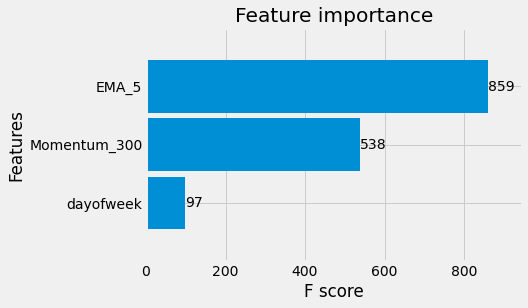

In [ ]:
plot_importance(reg, height=0.9)

In [ ]:
validacion = reg.predict(X_test)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [ ]:
validacion_p

validacion
0   54861.441406
1   54861.441406
2   54991.609375
3   55393.792969
4   55625.558594
5   55470.976562
6   55761.039062
7   51783.121094
8   51612.824219
9   48192.503906
10  52029.054688
11  52204.039062
12  51747.871094
13  52073.652344
14  51783.121094
15  51610.128906
16  51542.804688
17  55625.558594
18  55393.792969
19  55239.210938
20  55347.617188
21  54861.441406
22  54861.441406
23  54991.609375
24  55393.792969
25  55393.792969
26  55239.210938
27  55347.617188
28  54861.441406
29  54861.441406
30  54991.609375
31  55393.792969
32  55393.792969
33  55470.976562
34  55579.382812
35  54861.441406
36  54861.441406
37  54991.609375
38  55393.792969
39  55393.792969
40  55239.210938
41  55347.617188
42  54861.441406
43  54861.441406
44  54991.609375
45  55393.792969
46  55393.792969
47  55239.210938
48  55347.617188
49  54861.441406
50  54861.441406
51  54991.609375
52  55393.792969
53  55393.792969
54  55239.210938
55  55347.617188
56  54861.441406
57  54861.441406
58  54991.609375
59  55393.792969

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

15858821.39474262

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

3278.1152812500004

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
num_boost_round = 1000

In [ ]:
reg2 = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[17:50:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:44405.6
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:34999.3
[2]	Test-rmse:27336.6
[3]	Test-rmse:22603.9
[4]	Test-rmse:18418.1
[5]	Test-rmse:15420
[6]	Test-rmse:13127.4
[7]	Test-rmse:11296.1
[8]	Test-rmse:9672.72
[9]	Test-rmse:8462.82
[10]	Test-rmse:7623.39
[11]	Test-rmse:6950.52
[12]	Test-rmse:6299.7
[13]	Test-rmse:5771.69
[14]	Test-rmse:5345.62
[15]	Test-rmse:5003.87
[16]	Test-rmse:5000.04
[17]	Test-rmse:4768.13
[18]	Test-rmse:4587.5
[19]	Test-rmse:4438.34
[20]	Test-rmse:4324.21
[21]	Test-rmse:4233.05
[22]	Test-rmse:4159.09
[23]	Test-rmse:4175.09
[24]	Test-rmse:4122.88
[25]	Test-rmse:4082.34
[26]	Test-rmse:4050.09
[27]	Test-rmse:4021.3
[28]	Test-rmse:4030
[29]	Test-rmse:4028.71
[30]	Test-rmse:4011.42
[31]	Test-rmse:4012.63
[32]	Test-rmse:4012.66
[33]	Test-rmse:4004.97
[34]	Test-rmse:4004.7
[35]	Test-rmse:4004.99
[36]	Te

In [ ]:
print("Best MAE: {:.2f} with {} rounds".format(
                 reg2.best_score,
                 reg2.best_iteration+1))

Best MAE: 3980.10 with 54 rounds


In [ ]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=3,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

[17:50:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0      4714.187012      87.011738    4716.001790    166.431112
1      3323.325928      60.328871    3330.467773    128.382160
2      2344.070882      42.943463    2354.824381     98.628195
3      1655.147624      30.369449    1661.647787     76.235598
4      1170.811727      21.665370    1181.525553     61.336879
5       834.670552      14.429363     851.097249     48.197852
6       604.072774       9.792333     634.567301     40.125617
7       449.929993       5.832335     498.523702     32.450868
8       352.548675       3.624354     417.759633     27.502980
9       290.086192       2.959802     368.783315     23.740203
10      250.530680       2.567978     341.874552     23.694654
11      225.559168       3.581632     325.073608     20.098450
12      208.544540       3.818095     316.857045     18.958132
13      197.588237       4.475259     312.548116     18.496581
14      189.163167       5.522001     311.648611     18.407868
15      183.306036       5.577606     310.734894     17.770461
16      178.738118       6.369502     309.711192     16.217852
17      175.740596       6.431541     309.385935     16.257217
18      172.280334       8.017765     308.899221     16.128495
19      169.297460       8.274918     308.350342     16.518446
20      167.271734       8.895799     308.253337     16.091541
21      165.371175       9.500532     308.009013     15.617009

In [ ]:
cv_results['test-mae-mean'].min()

308.0090126666667

In [ ]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [ ]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

CV with max_depth=9, min_child_weight=5
CV with max_depth=9, min_child_weight=6
CV with max_depth=9, min_child_weight=7
CV with max_depth=10, min_child_weight=5
CV with max_depth=10, min_child_weight=6
CV with max_depth=10, min_child_weight=7
CV with max_depth=11, min_child_weight=5
CV with max_depth=11, min_child_weight=6
CV with max_depth=11, min_child_weight=7


In [ ]:
# Update our parameters
params['max_depth'] = max_depth
params['min_child_weight'] = min_child_weight

In [ ]:
# Run CV
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)

[17:50:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Update best MAE
mean_mae = cv_results['test-mae-mean'].min()
boost_rounds = cv_results['test-mae-mean'].argmin()
print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
if mean_mae < min_mae:
    min_mae = mean_mae
    best_params = (max_depth,min_child_weight)

	MAE 290.6236206 for 17 rounds


In [ ]:
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

Best params: 11, 7, MAE: 290.6236206


In [ ]:
params['max_depth'] = 11
params['min_child_weight'] = 7

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [ ]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[17:50:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 290.6236206 for 17 rounds
CV with subsample=1.0, colsample=0.9
[17:50:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50

In [ ]:
params['subsample'] = 0.9
params['colsample_bytree'] = 1.0

In [ ]:
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics={'mae'},early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CV with eta=0.3
[17:50:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 289.8674684 for 17 rounds

CV with eta=0.2
[17:50:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:59] WARNING: /workspace/src/objective/re

In [ ]:
params['eta'] = 0.01

In [ ]:
params['eval_metric'] = 'mae'

In [ ]:
params

{'colsample_bytree': 1.0,
 'eta': 0.01,
 'eval_metric': 'mae',
 'max_depth': 11,
 'min_child_weight': 7,
 'objective': 'reg:linear',
 'subsample': 0.9}

In [ ]:
best_model_Users = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=140
)

[17:51:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:55152.4
Will train until Test-mae hasn't improved in 140 rounds.
[1]	Test-mae:54779.3
[2]	Test-mae:54415.3
[3]	Test-mae:54047.4
[4]	Test-mae:53688.5
[5]	Test-mae:53334.4
[6]	Test-mae:52979.9
[7]	Test-mae:52636.9
[8]	Test-mae:52289.4
[9]	Test-mae:51896.1
[10]	Test-mae:51521.8
[11]	Test-mae:51183.7
[12]	Test-mae:50812.2
[13]	Test-mae:50443.9
[14]	Test-mae:50113.5
[15]	Test-mae:49792.7
[16]	Test-mae:49434
[17]	Test-mae:49063.4
[18]	Test-mae:48705.6
[19]	Test-mae:48365
[20]	Test-mae:48018.1
[21]	Test-mae:47685.9
[22]	Test-mae:47308.7
[23]	Test-mae:46966.3
[24]	Test-mae:46670.7
[25]	Test-mae:46373.9
[26]	Test-mae:46063.4
[27]	Test-mae:45772
[28]	Test-mae:45446.2
[29]	Test-mae:45118
[30]	Test-mae:44795.5
[31]	Test-mae:44469.3
[32]	Test-mae:44193
[33]	Test-mae:43896.9
[34]	Test-mae:43625.5
[35]	Test-mae:43321.8
[36]	Test-mae:42996.6
[37]	Test-mae:42661.4


In [ ]:
dtrain2 = xgb.DMatrix(X_test)

In [ ]:
validacion = best_model_Users.predict(dtrain2)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

49863296.46023162

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

6234.753796875

In [ ]:
y_pru = y_test

In [ ]:
y_pru = y_pru.reset_index()

In [ ]:
y_pru

index     Close
0    1959  55841.19
1    1960  57408.57
2    1961  54087.67
3    1962  48891.00
4    1963  49676.20
5    1964  47073.73
6    1965  46276.87
7    1966  46106.43
8    1967  45135.66
9    1968  49587.03
10   1969  48440.65
11   1970  50349.37
12   1971  48374.09
13   1972  48751.71
14   1973  48882.20
15   1974  50971.75
16   1975  52375.17
17   1976  54884.50
18   1977  55851.59
19   1978  57773.16
20   1979  57221.72
21   1980  61188.39
22   1981  58968.31
23   1982  55605.20
24   1983  56900.75
25   1984  58912.97
26   1985  57648.16
27   1986  58030.01
28   1987  58102.28
29   1988  57351.56
30   1989  54083.25
31   1990  54340.89
32   1991  52303.65
33   1992  51293.78
34   1993  55025.59
35   1994  55817.14
36   1995  55777.63
37   1996  57635.47
38   1997  58746.57
39   1998  58740.55
40   1999  58720.44
41   2000  58950.01
42   2001  57051.94
43   2002  58202.01
44   2003  59129.99
45   2004  57991.15
46   2005  55953.45
47   2006  58077.52
48   2007  58142.54
49   2008  59769.13
50   2009  60002.43
51   2010  59860.00
52   2011  63575.00
53   2012  62959.53
54   2013  63159.98
55   2014  61334.80
56   2015  60006.66
57   2016  56150.01
58   2017  55633.14
59   2018  56566.46

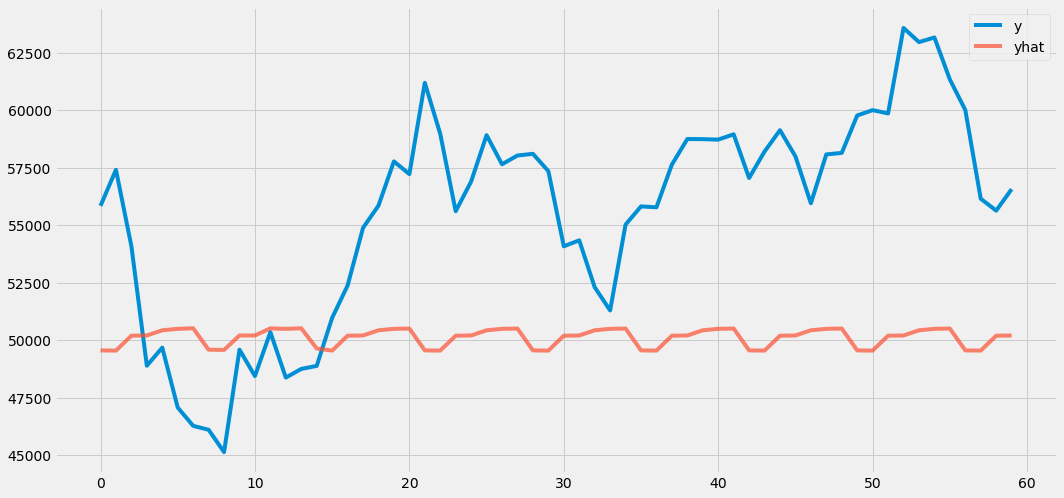

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(y_pru['Close'], label='y')
plt.plot(validacion_p, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
dtrain2 = xgb.DMatrix(scaled)

In [ ]:
validacion = best_model_Users.predict(dtrain2)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})
validacion_p

validacion
0       264.683929
1       262.715973
2       262.532379
3       262.538116
4       264.371094
...            ...
2014  50506.828125
2015  49557.140625
2016  49548.632812
2017  50195.226562
2018  50205.710938

[2019 rows x 1 columns]

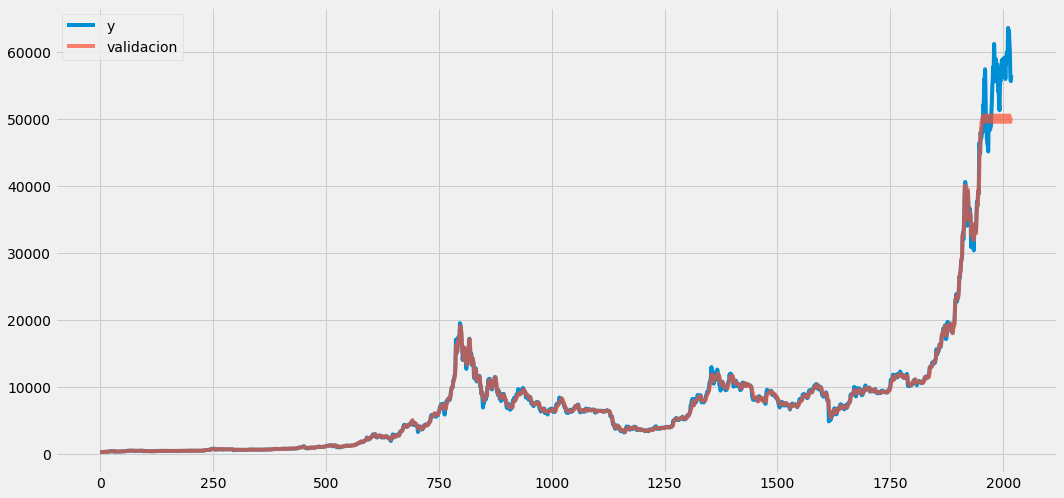

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(df2['Close'], label='y')
plt.plot(validacion_p, label='validacion', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
!pip install shap

     |████████████████████████████████| 358kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491627 sha256=93cf00596444903ea55a7c62e5112402c0d6b2bb6233b9f46ae474e97ca33857
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
!pip install eli5

     |████████████████████████████████| 112kB 3.8MB/s 


In [ ]:
!pip install lime

     |████████████████████████████████| 276kB 2.9MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283846 sha256=ab7cc5cc125db2d8edab261e6839fdb499817338da4dabb4856adabfd5ec7145
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [ ]:
from collections import Counter
import shap
import eli5
import lime
from lime.lime_tabular import LimeTabularExplainer
shap.initjs()

The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.


In [ ]:
!pip install s3fs

     |████████████████████████████████| 51kB 2.8MB/s 
     |████████████████████████████████| 112kB 5.7MB/s 
     |████████████████████████████████| 7.4MB 11.6MB/s 
     |████████████████████████████████| 1.3MB 43.5MB/s 
     |████████████████████████████████| 153kB 44.4MB/s 
     |████████████████████████████████| 296kB 37.4MB/s 
     |████████████████████████████████| 143kB 40.8MB/s 
  Created wheel for aiobotocore: filename=aiobotocore-1.3.0-cp37-none-any.whl size=45781 sha256=3f4dff49a8a65da6c0c6a46a063d8c2bf9e653db34a8e9e19445d05034dde52e
  Stored in directory: /root/.cache/pip/wheels/1d/5b/92/72a47210109971364c619c41e29289d4e7d58269f0cc653bf1
Successfully built aiobotocore
ERROR: requests 2.23.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib

In [ ]:
import time
from scipy import stats
import datetime
import s3fs
import statistics
import decimal
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

import pandas as pd, numpy as np, os, random, math, matplotlib, pylab, scipy, gc

from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBRegressor

random.seed(1)
np.random.seed(1)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# use labeled data set
shap_explainer = shap.TreeExplainer(best_model_Users)
test_shap_values = shap_explainer.shap_values(X_test)
print('Expected Value:', shap_explainer.expected_value)
pd.DataFrame(test_shap_values).head()

Expected Value: 6695.842


0            1           2
0  37498.402344  5656.795410 -291.420502
1  37522.089844  5648.786133 -315.665771
2  37675.789062  5754.878418   70.963005
3  37671.113281  5766.779785   74.196236
4  37747.195312  5811.588867  178.835739

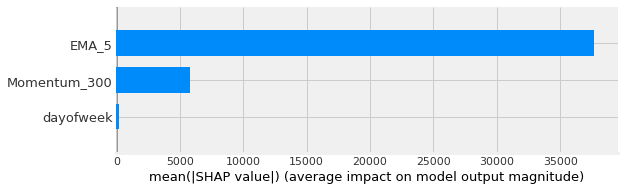

In [ ]:
shap.summary_plot(test_shap_values, X_test, plot_type="bar", max_display=30)

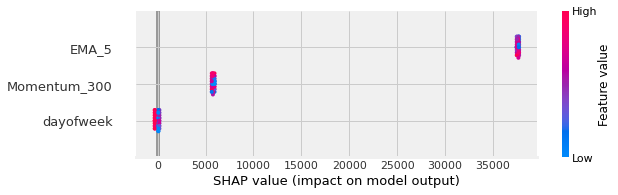

In [ ]:
# shows feature contribution
shap.summary_plot(test_shap_values, X_test, max_display=30)

#Hasta aqui

In [ ]:
2019*0.7


1413.3

In [ ]:
2019*0.15

302.84999999999997

In [ ]:
1413+303

1716

In [ ]:
df2

Close         Volume  ...  dayofmonth  weekofyear
0       249.50    3021.120000  ...          11          41
1       247.60    9493.890000  ...          12          42
2       250.00   12875.400000  ...          13          42
3       253.00   30115.770000  ...          14          42
4       255.26   50535.450000  ...          15          42
...        ...            ...  ...         ...         ...
2014  61334.80   91764.139884  ...          16          15
2015  60006.66   58912.256128  ...          17          15
2016  56150.01  124882.131824  ...          18          15
2017  55633.14   78229.042267  ...          19          16
2018  56566.46   60500.152593  ...          20          16

[2019 rows x 48 columns]

df2.shape()

# XGBoost

In [ ]:
df2

Close         Volume  ...  dayofmonth  weekofyear
0       249.50    3021.120000  ...          11          41
1       247.60    9493.890000  ...          12          42
2       250.00   12875.400000  ...          13          42
3       253.00   30115.770000  ...          14          42
4       255.26   50535.450000  ...          15          42
...        ...            ...  ...         ...         ...
2014  61334.80   91764.139884  ...          16          15
2015  60006.66   58912.256128  ...          17          15
2016  56150.01  124882.131824  ...          18          15
2017  55633.14   78229.042267  ...          19          16
2018  56566.46   60500.152593  ...          20          16

[2019 rows x 48 columns]

In [ ]:
X = df2.iloc[:, 1:48]
y = df2.iloc[:, [0]]

In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)

In [ ]:
X_train = scaled[:1959]
y_train = y.Close[:1959]
X_test = scaled[1959:]
y_test = y.Close[1959:]

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[17:52:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

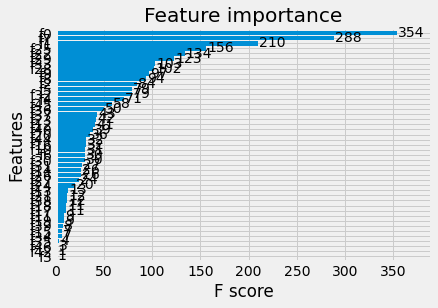

In [ ]:
plot_importance(reg, height=0.9)

In [ ]:
validacion = reg.predict(X_test)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [ ]:
validacion_p

validacion
0   52238.132812
1   52215.542969
2   49556.933594
3   41627.457031
4   39764.859375
5   39356.812500
6   40106.156250
7   39394.085938
8   38635.632812
9   38995.199219
10  38906.578125
11  40586.371094
12  40564.945312
13  40846.851562
14  40878.730469
15  41326.457031
16  48466.925781
17  50313.230469
18  48418.347656
19  49029.410156
20  48355.792969
21  51075.859375
22  51899.921875
23  49105.136719
24  48286.964844
25  48303.105469
26  48331.148438
27  48209.519531
28  48116.613281
29  48121.367188
30  40524.753906
31  40308.140625
32  39584.195312
33  39668.019531
34  40613.371094
35  40046.140625
36  40074.726562
37  47680.460938
38  47657.308594
39  49562.273438
40  50154.199219
41  51231.777344
42  50687.074219
43  50535.550781
44  51213.972656
45  51214.925781
46  51156.082031
47  50843.863281
48  52147.828125
49  52704.710938
50  51377.386719
51  51421.351562
52  51572.460938
53  53052.046875
54  51656.464844
55  51500.796875
56  51623.250000
57  51518.449219
58  51738.558594
59  51797.730469

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

81779591.89943811

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

8596.110651041667

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
num_boost_round = 1000

In [ ]:
reg2 = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[17:52:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:44405.6
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:35111.8
[2]	Test-rmse:28230.5
[3]	Test-rmse:23267.9
[4]	Test-rmse:20230.5
[5]	Test-rmse:18257.9
[6]	Test-rmse:16511.7
[7]	Test-rmse:14679.3
[8]	Test-rmse:13490.9
[9]	Test-rmse:12286.1
[10]	Test-rmse:11728.8
[11]	Test-rmse:11274
[12]	Test-rmse:11037.7
[13]	Test-rmse:10701.4
[14]	Test-rmse:10458.9
[15]	Test-rmse:10235
[16]	Test-rmse:10071.9
[17]	Test-rmse:9968.02
[18]	Test-rmse:9886.76
[19]	Test-rmse:9820.13
[20]	Test-rmse:9762.12
[21]	Test-rmse:9718.41
[22]	Test-rmse:9693.11
[23]	Test-rmse:9683.54
[24]	Test-rmse:9656.44
[25]	Test-rmse:9635.98
[26]	Test-rmse:9626.15
[27]	Test-rmse:9609.43
[28]	Test-rmse:9596.99
[29]	Test-rmse:9603.88
[30]	Test-rmse:9591.83
[31]	Test-rmse:9587.11
[32]	Test-rmse:9590.04
[33]	Test-rmse:9588.53
[34]	Test-rmse:9589.35
[35]	Test-rmse:9589.65
[3

In [ ]:
print("Best MAE: {:.2f} with {} rounds".format(
                 reg2.best_score,
                 reg2.best_iteration+1))

Best MAE: 9583.85 with 38 rounds


In [ ]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=3,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

[17:52:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:52:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:52:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0      4715.875000      86.380293    4723.403157    159.074873
1      3325.403646      61.119230    3336.511963    122.598375
2      2347.658285      44.343282    2354.346761     92.467725
3      1656.684001      31.806645    1663.163696     69.809292
4      1171.006307      21.719432    1178.019653     57.180428
5       828.732503      15.394137     843.021241     45.678017
6       588.726318      10.289750     616.022848     40.641406
7       421.772634       7.369476     467.180756     39.309645
8       308.861776       5.040106     374.084829     37.341182
9       234.022741       3.261034     318.930613     36.247524
10      185.204198       3.983097     289.641571     34.444210
11      153.496964       4.229885     273.421610     32.911825
12      133.660380       4.444523     264.048579     31.529912
13      120.611038       4.132865     257.776504     30.403063
14      111.906222       4.140800     255.379552     30.147335
15      105.295815       4.655212     253.838033     29.875182
16      100.455581       5.633016     253.549388     30.151238
17       96.746791       6.498115     253.503855     29.605653

In [ ]:
cv_results['test-mae-mean'].min()

253.50385533333335

In [ ]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [ ]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

CV with max_depth=9, min_child_weight=5
CV with max_depth=9, min_child_weight=6
CV with max_depth=9, min_child_weight=7
CV with max_depth=10, min_child_weight=5
CV with max_depth=10, min_child_weight=6
CV with max_depth=10, min_child_weight=7
CV with max_depth=11, min_child_weight=5
CV with max_depth=11, min_child_weight=6
CV with max_depth=11, min_child_weight=7


In [ ]:
# Update our parameters
params['max_depth'] = max_depth
params['min_child_weight'] = min_child_weight

In [ ]:
# Run CV
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)

[17:52:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:52:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:52:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:52:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:52:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Update best MAE
mean_mae = cv_results['test-mae-mean'].min()
boost_rounds = cv_results['test-mae-mean'].argmin()
print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
if mean_mae < min_mae:
    min_mae = mean_mae
    best_params = (max_depth,min_child_weight)

	MAE 239.17889399999999 for 21 rounds


In [ ]:
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

Best params: 11, 7, MAE: 239.17889399999999


In [ ]:
params['max_depth'] = 11
params['min_child_weight'] = 7

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [ ]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[17:52:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:52:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:52:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:52:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:52:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 239.17889399999999 for 21 rounds
CV with subsample=1.0, colsample=0.9
[17:52:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:52:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

In [ ]:
params['subsample'] = 1.0
params['colsample_bytree'] = 0.9

In [ ]:
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics={'mae'},early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CV with eta=0.3
[17:53:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:53:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:53:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:53:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:53:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 238.07593379999997 for 29 rounds

CV with eta=0.2
[17:53:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:53:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:53:26] WARNING: /workspace/src/objec

In [ ]:
params['eta'] = 0.01

In [ ]:
params['eval_metric'] = 'mae'

In [ ]:
params

{'colsample_bytree': 0.9,
 'eta': 0.01,
 'eval_metric': 'mae',
 'max_depth': 11,
 'min_child_weight': 7,
 'objective': 'reg:linear',
 'subsample': 1.0}

In [ ]:
best_model_Users = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=140
)

[17:55:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:55148.9
Will train until Test-mae hasn't improved in 140 rounds.
[1]	Test-mae:54774.3
[2]	Test-mae:54403.3
[3]	Test-mae:54035.9
[4]	Test-mae:53672.1
[5]	Test-mae:53312
[6]	Test-mae:52938.4
[7]	Test-mae:52585.1
[8]	Test-mae:52218.6
[9]	Test-mae:51872.1
[10]	Test-mae:51506.3
[11]	Test-mae:51130
[12]	Test-mae:50777.2
[13]	Test-mae:50421.6
[14]	Test-mae:50055.2
[15]	Test-mae:49713.8
[16]	Test-mae:49352.9
[17]	Test-mae:49010.6
[18]	Test-mae:48656.1
[19]	Test-mae:48305.9
[20]	Test-mae:47964.9
[21]	Test-mae:47620
[22]	Test-mae:47293.4
[23]	Test-mae:46955.7
[24]	Test-mae:46621.4
[25]	Test-mae:46290.4
[26]	Test-mae:45962.5
[27]	Test-mae:45629.2
[28]	Test-mae:45306.2
[29]	Test-mae:44979.1
[30]	Test-mae:44681.6
[31]	Test-mae:44360.4
[32]	Test-mae:44042.2
[33]	Test-mae:43727.1
[34]	Test-mae:43421.1
[35]	Test-mae:43111.8
[36]	Test-mae:42805.5
[37]	Test-mae:4250

In [ ]:
dtrain2 = xgb.DMatrix(X_test)

In [ ]:
validacion = best_model_Users.predict(dtrain2)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

88800454.13761562

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

9071.118854166669

In [ ]:
y_pru = y_test

In [ ]:
y_pru = y_pru.reset_index()

In [ ]:
y_pru

index     Close
0    1959  55841.19
1    1960  57408.57
2    1961  54087.67
3    1962  48891.00
4    1963  49676.20
5    1964  47073.73
6    1965  46276.87
7    1966  46106.43
8    1967  45135.66
9    1968  49587.03
10   1969  48440.65
11   1970  50349.37
12   1971  48374.09
13   1972  48751.71
14   1973  48882.20
15   1974  50971.75
16   1975  52375.17
17   1976  54884.50
18   1977  55851.59
19   1978  57773.16
20   1979  57221.72
21   1980  61188.39
22   1981  58968.31
23   1982  55605.20
24   1983  56900.75
25   1984  58912.97
26   1985  57648.16
27   1986  58030.01
28   1987  58102.28
29   1988  57351.56
30   1989  54083.25
31   1990  54340.89
32   1991  52303.65
33   1992  51293.78
34   1993  55025.59
35   1994  55817.14
36   1995  55777.63
37   1996  57635.47
38   1997  58746.57
39   1998  58740.55
40   1999  58720.44
41   2000  58950.01
42   2001  57051.94
43   2002  58202.01
44   2003  59129.99
45   2004  57991.15
46   2005  55953.45
47   2006  58077.52
48   2007  58142.54
49   2008  59769.13
50   2009  60002.43
51   2010  59860.00
52   2011  63575.00
53   2012  62959.53
54   2013  63159.98
55   2014  61334.80
56   2015  60006.66
57   2016  56150.01
58   2017  55633.14
59   2018  56566.46

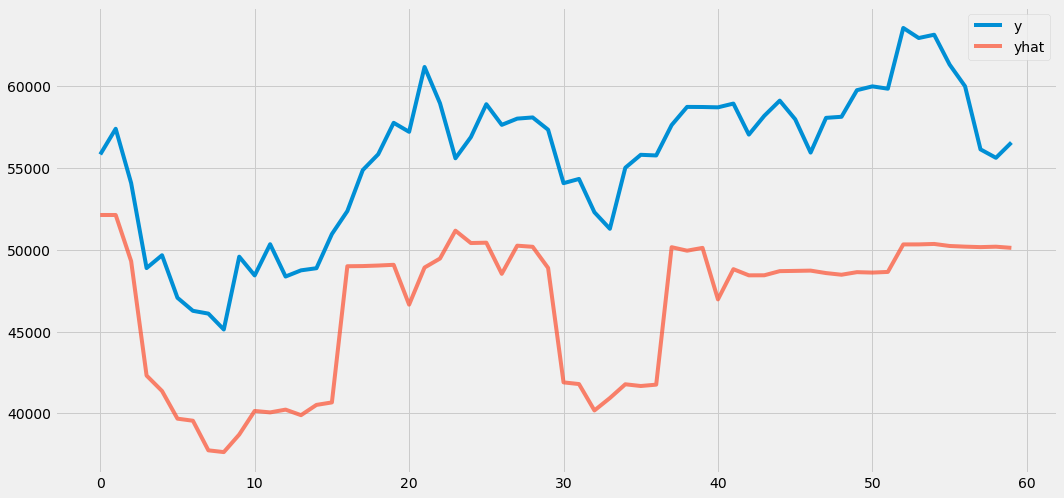

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(y_pru['Close'], label='y')
plt.plot(validacion_p, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
dtrain2 = xgb.DMatrix(scaled)

In [ ]:
validacion = best_model_Users.predict(dtrain2)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})
validacion_p

validacion
0       257.664368
1       257.292877
2       260.140961
3       260.140961
4       261.064575
...            ...
2014  50241.605469
2015  50201.195312
2016  50172.503906
2017  50197.996094
2018  50126.621094

[2019 rows x 1 columns]

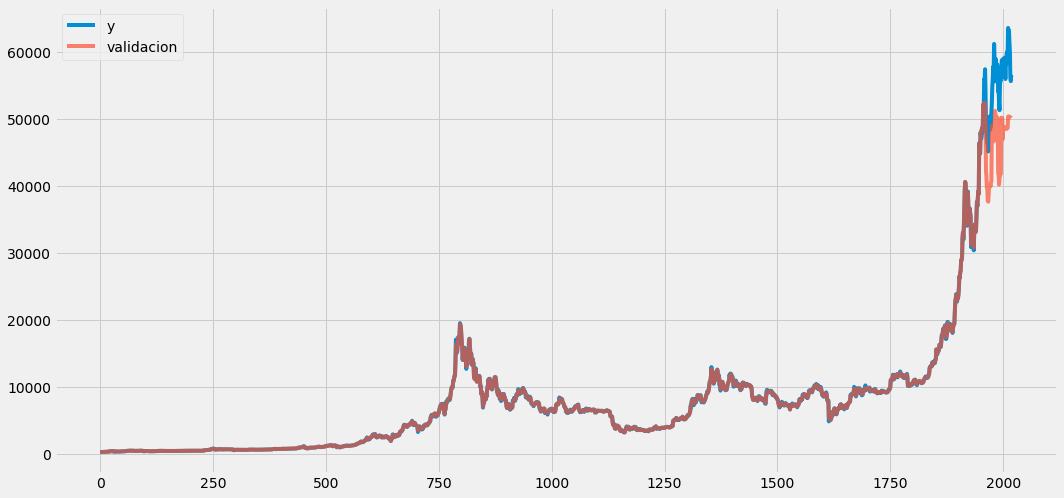

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(df2['Close'], label='y')
plt.plot(validacion_p, label='validacion', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
# use labeled data set
shap_explainer = shap.TreeExplainer(best_model_Users)
test_shap_values = shap_explainer.shap_values(X_test)
print('Expected Value:', shap_explainer.expected_value)
pd.DataFrame(test_shap_values).head()

Expected Value: 6694.747


0           1            2   ...          44          45          46
0  10.976119   85.466545  1725.789551  ...  114.770432  -12.622321  143.675430
1  10.279765  138.811661  1728.047363  ...  114.937157  -47.196426  143.677246
2  18.850842    5.832772   987.077454  ...  115.492569  -58.841312  143.846359
3  18.013577    2.995869   955.401672  ...  113.897438 -104.653824  143.856995
4   9.873226   24.102722  1546.189087  ...  117.345749 -152.862305  144.490051

[5 rows x 47 columns]

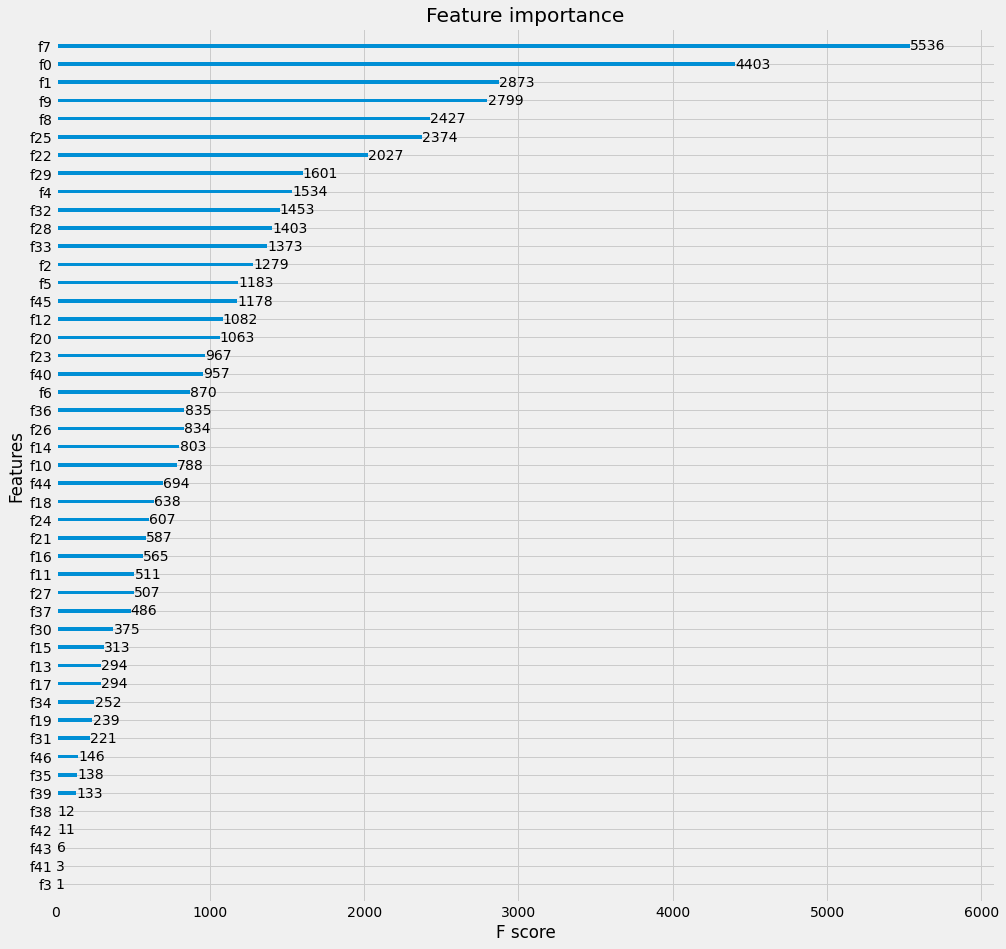

In [ ]:
from xgboost import plot_importance
best_model_Users.feature_names_ = df2.columns.values[1:48]
fig, ax = plt.subplots(1,1,figsize=(15,15))
plot_importance(best_model_Users, ax=ax)
plt.savefig("xgboost_feature_importance.png")

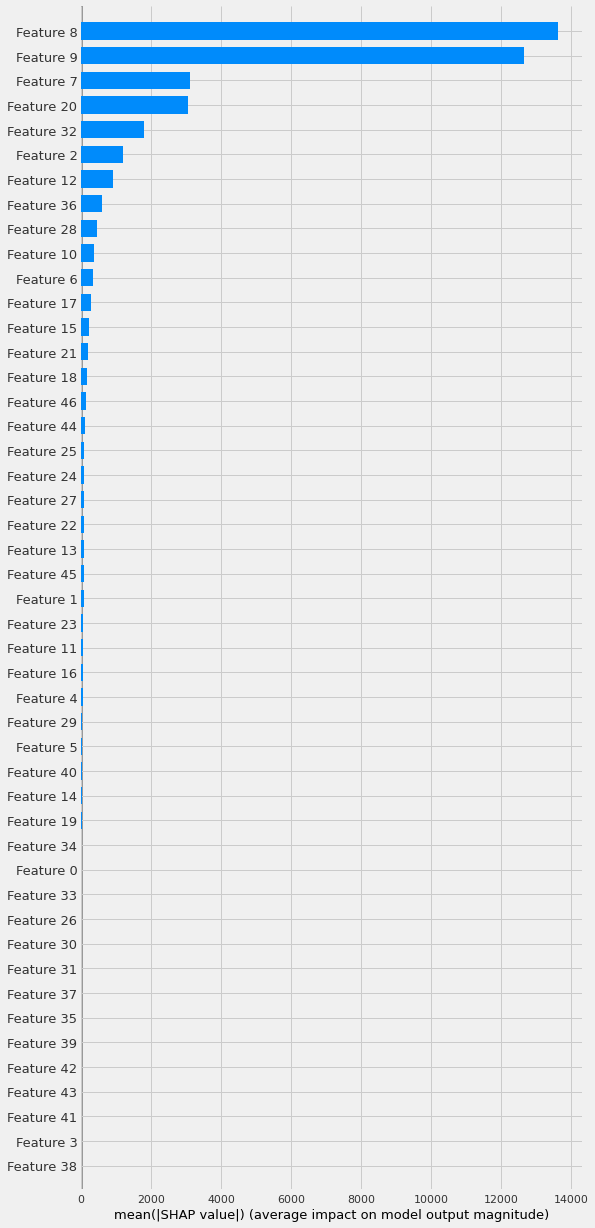

In [ ]:
shap.summary_plot(test_shap_values, X_test, plot_type="bar", max_display=48, show=False)
plt.savefig("shap_feature_importance.png")

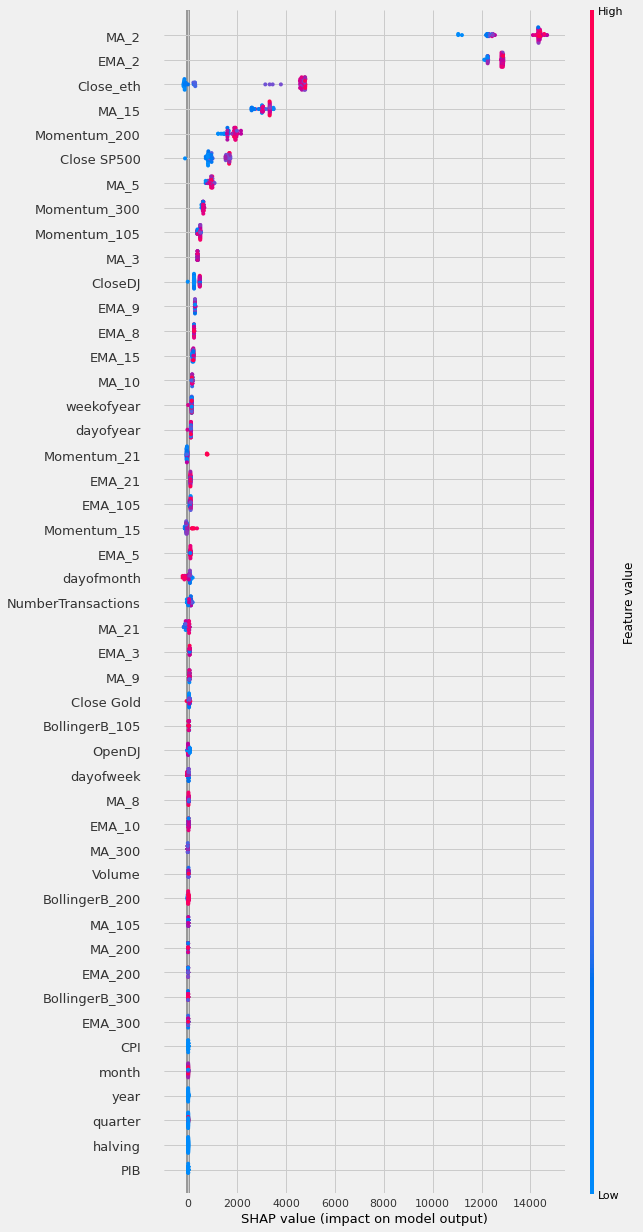

In [ ]:
# shows feature contribution
shap.summary_plot(test_shap_values, X_test, max_display=48, feature_names=df2.columns.values[1:48])

In [ ]:
X

NumberTransactions  Close SP500  ...  dayofmonth  weekofyear
0                 104550         0.00  ...          11          41
1                 134410      2052.23  ...          12          42
2                 134878      2003.69  ...          13          42
3                 141985      1994.24  ...          14          42
4                 153495      2023.86  ...          15          42
...                  ...          ...  ...         ...         ...
2014             2639940      4185.47  ...          16          15
2015             2268816      4185.47  ...          17          15
2016             3444089      4185.47  ...          18          15
2017             2390527      4162.80  ...          19          16
2018             1750083      4162.80  ...          20          16

[2019 rows x 47 columns]

# XGBoost

In [ ]:
df2

Close         Volume  ...  dayofmonth  weekofyear
0       249.50    3021.120000  ...          11          41
1       247.60    9493.890000  ...          12          42
2       250.00   12875.400000  ...          13          42
3       253.00   30115.770000  ...          14          42
4       255.26   50535.450000  ...          15          42
...        ...            ...  ...         ...         ...
2014  61334.80   91764.139884  ...          16          15
2015  60006.66   58912.256128  ...          17          15
2016  56150.01  124882.131824  ...          18          15
2017  55633.14   78229.042267  ...          19          16
2018  56566.46   60500.152593  ...          20          16

[2019 rows x 48 columns]

In [ ]:
X = df2.iloc[:, [11,10,8,26,18,1,2]]
y = df2.iloc[:, [0]]

In [ ]:
X

MA_3         EMA_2  ...         Volume  NumberTransactions
0         0.000000      0.000000  ...    3021.120000              104550
1         0.000000      0.000000  ...    9493.890000              134410
2         0.000000    248.075000  ...   12875.400000              134878
3       249.033333    249.407692  ...   30115.770000              141985
4       250.200000    251.832500  ...   50535.450000              153495
...            ...           ...  ...            ...                 ...
2014  63231.503333  63022.286415  ...   91764.139884             2639940
2015  62484.770000  61897.295472  ...   58912.256128             2268816
2016  61500.480000  60636.871824  ...  124882.131824             3444089
2017  59163.823333  57645.630608  ...   78229.042267             2390527
2018  57263.270000  56303.970203  ...   60500.152593             1750083

[2019 rows x 7 columns]

In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)

In [ ]:
X_train = scaled[:1959]
y_train = y.Close[:1959]
X_test = scaled[1959:]
y_test = y.Close[1959:]

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[17:57:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

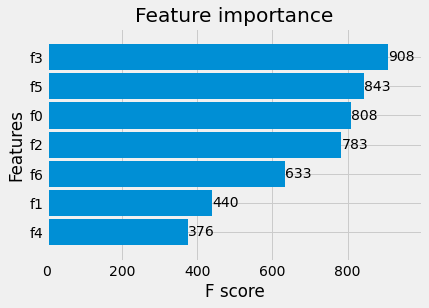

In [ ]:
plot_importance(reg, height=0.9)

In [ ]:
validacion = reg.predict(X_test)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [ ]:
validacion_p

validacion
0   55564.121094
1   55646.222656
2   55620.925781
3   47262.398438
4   46946.199219
5   45022.597656
6   42185.792969
7   39544.687500
8   39244.546875
9   39019.167969
10  39101.863281
11  39454.402344
12  41629.750000
13  41537.113281
14  41769.917969
15  43329.621094
16  50241.417969
17  52545.566406
18  52410.843750
19  53079.050781
20  52795.597656
21  53058.953125
22  52634.171875
23  52441.828125
24  52558.296875
25  52646.640625
26  52224.515625
27  53835.179688
28  53798.765625
29  53634.597656
30  46555.464844
31  45441.156250
32  43644.328125
33  43516.601562
34  45522.687500
35  44070.734375
36  43902.425781
37  52547.078125
38  51086.058594
39  52263.609375
40  50811.871094
41  51146.929688
42  50949.773438
43  50808.550781
44  52339.378906
45  52477.761719
46  52749.500000
47  50996.292969
48  50811.140625
49  52487.957031
50  52644.617188
51  52632.367188
52  52410.843750
53  52466.410156
54  53732.046875
55  53649.496094
56  52632.644531
57  52290.023438
58  52564.933594
59  52479.093750

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

46104835.89326604

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

6205.309671875001

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
num_boost_round = 1000

In [ ]:
reg2 = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[17:57:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:44405.6
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:35111.8
[2]	Test-rmse:28366.4
[3]	Test-rmse:23453.2
[4]	Test-rmse:19793.2
[5]	Test-rmse:17397.6
[6]	Test-rmse:15921.4
[7]	Test-rmse:14148.2
[8]	Test-rmse:12451.8
[9]	Test-rmse:11242.2
[10]	Test-rmse:10230.5
[11]	Test-rmse:9930.27
[12]	Test-rmse:9700.98
[13]	Test-rmse:9506.32
[14]	Test-rmse:9013.53
[15]	Test-rmse:8714.56
[16]	Test-rmse:8464.85
[17]	Test-rmse:8164.78
[18]	Test-rmse:7926.58
[19]	Test-rmse:7720.4
[20]	Test-rmse:7549.99
[21]	Test-rmse:7406.04
[22]	Test-rmse:7290.04
[23]	Test-rmse:7186.96
[24]	Test-rmse:7102.93
[25]	Test-rmse:7058.35
[26]	Test-rmse:6996.9
[27]	Test-rmse:6965.72
[28]	Test-rmse:6922.55
[29]	Test-rmse:6919.48
[30]	Test-rmse:6881.47
[31]	Test-rmse:6860.28
[32]	Test-rmse:6858.66
[33]	Test-rmse:6854.15
[34]	Test-rmse:6850.33
[35]	Test-rmse:6852.81


In [ ]:
print("Best MAE: {:.2f} with {} rounds".format(
                 reg2.best_score,
                 reg2.best_iteration+1))

Best MAE: 6829.67 with 51 rounds


In [ ]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=3,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

[17:57:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0      4715.810710      86.366870    4722.855143    157.965435
1      3325.304036      60.975762    3340.519531    120.412070
2      2346.092041      43.646789    2360.497314     85.673653
3      1655.935059      30.925481    1670.535807     68.083233
4      1169.064901      21.654806    1181.975667     54.991958
5       826.869385      15.068876     844.092977     45.075726
6       588.460225      10.419132     617.511169     35.644321
7       425.111674       6.069192     470.544637     29.751402
8       315.361074       4.326160     377.076640     27.844580
9       242.492284       3.198324     322.502574     22.963907
10      196.647756       3.022928     290.153900     20.740317
11      166.951630       1.909578     271.910660     20.132228
12      148.911916       2.604657     261.510981     20.125523
13      136.978729       3.628755     256.189214     19.022311
14      128.265828       4.082506     252.611501     17.743241
15      122.340233       4.531647     251.570862     16.921518
16      117.472608       4.717291     250.632502     16.577345
17      113.995239       5.107315     250.523850     16.888294
18      110.403926       5.966757     250.318247     16.544359
19      108.014776       6.567350     249.911977     16.788282
20      104.685165       6.142522     249.552556     16.912838
21      101.661636       6.268847     249.615209     17.138318
22       98.792938       5.856220     248.994969     17.120332

In [ ]:
cv_results['test-mae-mean'].min()

248.9949693333333

In [ ]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [ ]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

CV with max_depth=9, min_child_weight=5
CV with max_depth=9, min_child_weight=6
CV with max_depth=9, min_child_weight=7
CV with max_depth=10, min_child_weight=5
CV with max_depth=10, min_child_weight=6
CV with max_depth=10, min_child_weight=7
CV with max_depth=11, min_child_weight=5
CV with max_depth=11, min_child_weight=6
CV with max_depth=11, min_child_weight=7


In [ ]:
# Update our parameters
params['max_depth'] = max_depth
params['min_child_weight'] = min_child_weight

In [ ]:
# Run CV
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)

[17:57:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Update best MAE
mean_mae = cv_results['test-mae-mean'].min()
boost_rounds = cv_results['test-mae-mean'].argmin()
print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
if mean_mae < min_mae:
    min_mae = mean_mae
    best_params = (max_depth,min_child_weight)

	MAE 248.78764339999998 for 17 rounds


In [ ]:
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

Best params: 11, 7, MAE: 248.78764339999998


In [ ]:
params['max_depth'] = 11
params['min_child_weight'] = 7

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [ ]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[17:57:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 248.78764339999998 for 17 rounds
CV with subsample=1.0, colsample=0.9
[17:57:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

In [ ]:
params['subsample'] = 0.8
params['colsample_bytree'] = 0.8

In [ ]:
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics={'mae'},early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CV with eta=0.3
[17:57:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 247.5201294 for 27 rounds

CV with eta=0.2
[17:57:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:57:31] WARNING: /workspace/src/objective/re

In [ ]:
params['eta'] = 0.05

In [ ]:
params['eval_metric'] = 'mae'

In [ ]:
params

{'colsample_bytree': 0.8,
 'eta': 0.05,
 'eval_metric': 'mae',
 'max_depth': 11,
 'min_child_weight': 7,
 'objective': 'reg:linear',
 'subsample': 0.8}

In [ ]:
best_model_Users = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=140
)

[17:58:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:53651.8
Will train until Test-mae hasn't improved in 140 rounds.
[1]	Test-mae:51911.1
[2]	Test-mae:50244.7
[3]	Test-mae:48523
[4]	Test-mae:47019.8
[5]	Test-mae:45631.9
[6]	Test-mae:44037.6
[7]	Test-mae:42640.8
[8]	Test-mae:41071.4
[9]	Test-mae:39560.6
[10]	Test-mae:38100.5
[11]	Test-mae:36835.9
[12]	Test-mae:35458.6
[13]	Test-mae:34502.9
[14]	Test-mae:33364.2
[15]	Test-mae:32146.3
[16]	Test-mae:31156.8
[17]	Test-mae:30202.3
[18]	Test-mae:29281.6
[19]	Test-mae:28384.4
[20]	Test-mae:27539.5
[21]	Test-mae:26734.7
[22]	Test-mae:25868.7
[23]	Test-mae:25146.4
[24]	Test-mae:24479.1
[25]	Test-mae:23796.1
[26]	Test-mae:23199.7
[27]	Test-mae:22599.6
[28]	Test-mae:21957.4
[29]	Test-mae:21378.4
[30]	Test-mae:20824.7
[31]	Test-mae:20203.3
[32]	Test-mae:19837.6
[33]	Test-mae:19346.1
[34]	Test-mae:19014.8
[35]	Test-mae:18591
[36]	Test-mae:18117.3
[37]	Test-mae:17

In [ ]:
dtrain2 = xgb.DMatrix(X_test)

In [ ]:
validacion = best_model_Users.predict(dtrain2)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

90541214.70162287

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

9072.290859375

In [ ]:
y_pru = y_test

In [ ]:
y_pru = y_pru.reset_index()

In [ ]:
y_pru

index     Close
0    1959  55841.19
1    1960  57408.57
2    1961  54087.67
3    1962  48891.00
4    1963  49676.20
5    1964  47073.73
6    1965  46276.87
7    1966  46106.43
8    1967  45135.66
9    1968  49587.03
10   1969  48440.65
11   1970  50349.37
12   1971  48374.09
13   1972  48751.71
14   1973  48882.20
15   1974  50971.75
16   1975  52375.17
17   1976  54884.50
18   1977  55851.59
19   1978  57773.16
20   1979  57221.72
21   1980  61188.39
22   1981  58968.31
23   1982  55605.20
24   1983  56900.75
25   1984  58912.97
26   1985  57648.16
27   1986  58030.01
28   1987  58102.28
29   1988  57351.56
30   1989  54083.25
31   1990  54340.89
32   1991  52303.65
33   1992  51293.78
34   1993  55025.59
35   1994  55817.14
36   1995  55777.63
37   1996  57635.47
38   1997  58746.57
39   1998  58740.55
40   1999  58720.44
41   2000  58950.01
42   2001  57051.94
43   2002  58202.01
44   2003  59129.99
45   2004  57991.15
46   2005  55953.45
47   2006  58077.52
48   2007  58142.54
49   2008  59769.13
50   2009  60002.43
51   2010  59860.00
52   2011  63575.00
53   2012  62959.53
54   2013  63159.98
55   2014  61334.80
56   2015  60006.66
57   2016  56150.01
58   2017  55633.14
59   2018  56566.46

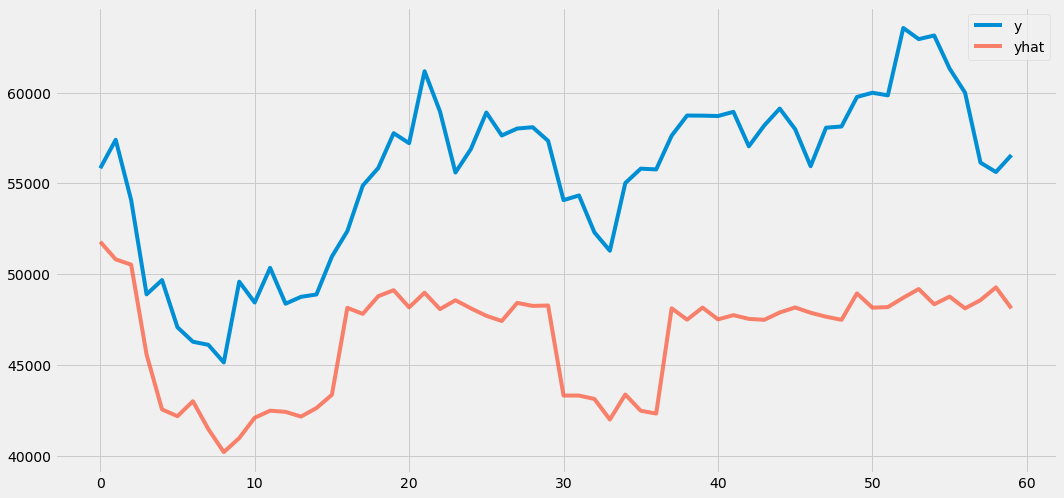

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(y_pru['Close'], label='y')
plt.plot(validacion_p, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
dtrain2 = xgb.DMatrix(scaled)

In [ ]:
validacion = best_model_Users.predict(dtrain2)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})
validacion_p

validacion
0       257.450165
1       256.871948
2       257.150452
3       257.450165
4       257.011688
...            ...
2014  48763.824219
2015  48116.351562
2016  48572.429688
2017  49274.441406
2018  48119.992188

[2019 rows x 1 columns]

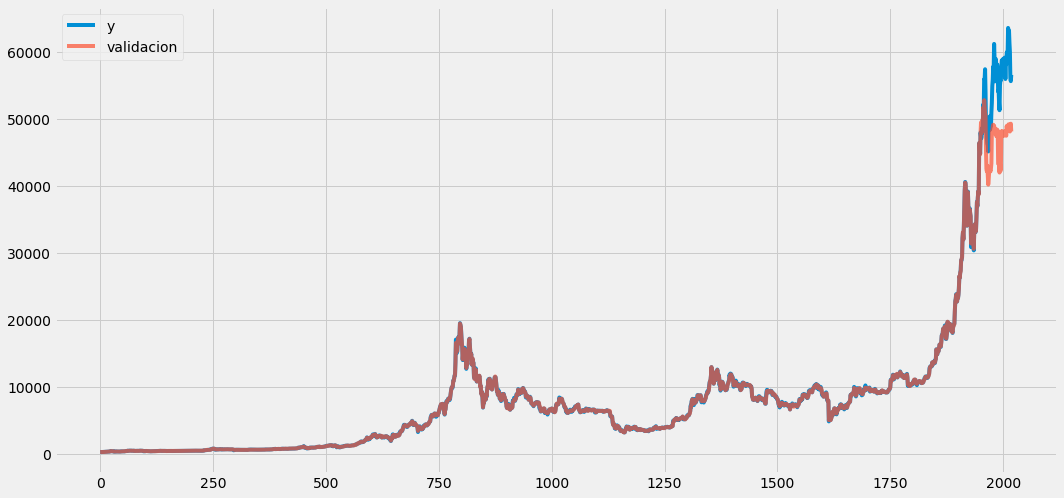

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(df2['Close'], label='y')
plt.plot(validacion_p, label='validacion', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
# use labeled data set
shap_explainer = shap.TreeExplainer(best_model_Users)
test_shap_values = shap_explainer.shap_values(X_test)
print('Expected Value:', shap_explainer.expected_value)
pd.DataFrame(test_shap_values).head()

Expected Value: 6660.846


0             1  ...           5            6
0  16278.507812  18605.816406  ...  142.595688   915.606628
1  16187.838867  18582.273438  ...  116.781822   592.458069
2  16160.178711  18525.498047  ...  -35.674866  1134.285889
3  15050.805664  17682.031250  ...  -24.767027  1041.532104
4  14836.455078  17486.851562  ...  -91.612808   205.614777

[5 rows x 7 columns]

In [ ]:
df2.columns.values[[8,1,10,26]]

array(['Close_eth', 'Volume', 'EMA_2', 'Momentum_21'], dtype=object)

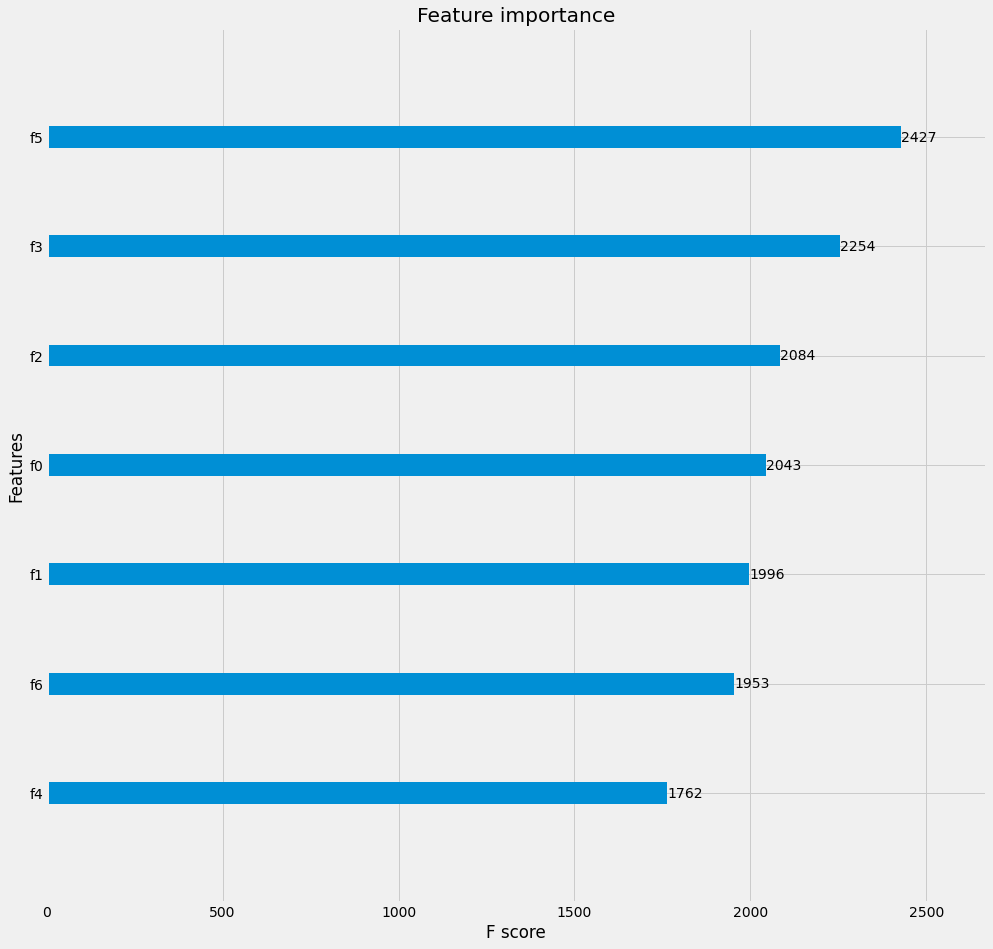

In [ ]:
from xgboost import plot_importance
best_model_Users.feature_names_ = df2.columns.values[1:48]
fig, ax = plt.subplots(1,1,figsize=(15,15))
plot_importance(best_model_Users, ax=ax)
plt.savefig("xgboost_feature_importance.png")

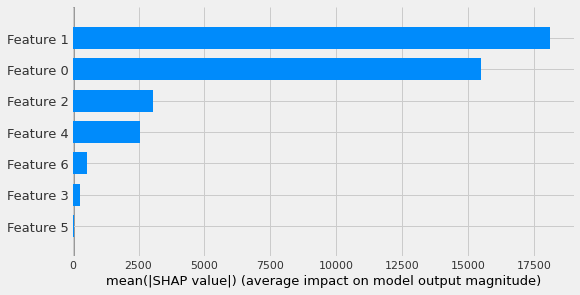

In [ ]:
shap.summary_plot(test_shap_values, X_test, plot_type="bar", max_display=48, show=False)
plt.savefig("shap_feature_importance.png")

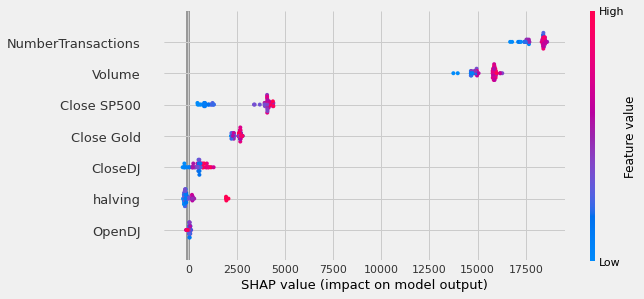

In [ ]:
# shows feature contribution
shap.summary_plot(test_shap_values, X_test, max_display=48, feature_names=df2.columns.values[1:48])

In [ ]:
X

MA_3         EMA_2  ...         Volume  NumberTransactions
0         0.000000      0.000000  ...    3021.120000              104550
1         0.000000      0.000000  ...    9493.890000              134410
2         0.000000    248.075000  ...   12875.400000              134878
3       249.033333    249.407692  ...   30115.770000              141985
4       250.200000    251.832500  ...   50535.450000              153495
...            ...           ...  ...            ...                 ...
2014  63231.503333  63022.286415  ...   91764.139884             2639940
2015  62484.770000  61897.295472  ...   58912.256128             2268816
2016  61500.480000  60636.871824  ...  124882.131824             3444089
2017  59163.823333  57645.630608  ...   78229.042267             2390527
2018  57263.270000  56303.970203  ...   60500.152593             1750083

[2019 rows x 7 columns]

In [ ]:
# Visualizar la relación entre variables usando parcelas
plt.figure(figsize = (15, 15))

fig = px.scatter_matrix(X,
    dimensions = X.columns[:8], color = 'EMA_2')

fig.update_layout(
    title = 'Sales Data',
    width = 1100,
    height = 1100,
)
fig.show()

# Los colores segmentan los meses para poder ubicarlos en las graficas en las que no es tan evidente a que mes pertenecen


<Figure size 1080x1080 with 0 Axes>

In [ ]:
list(df2)

['Close',
 'Volume',
 'NumberTransactions',
 'Close SP500',
 'halving',
 'Close Gold',
 'OpenDJ',
 'CloseDJ',
 'Close_eth',
 'MA_2',
 'EMA_2',
 'MA_3',
 'EMA_3',
 'MA_5',
 'EMA_5',
 'MA_8',
 'EMA_8',
 'MA_9',
 'EMA_9',
 'MA_10',
 'EMA_10',
 'MA_15',
 'EMA_15',
 'Momentum_15',
 'MA_21',
 'EMA_21',
 'Momentum_21',
 'MA_105',
 'EMA_105',
 'Momentum_105',
 'BollingerB_105',
 'MA_200',
 'EMA_200',
 'Momentum_200',
 'BollingerB_200',
 'MA_300',
 'EMA_300',
 'Momentum_300',
 'BollingerB_300',
 'PIB',
 'CPI',
 'dayofweek',
 'quarter',
 'month',
 'year',
 'dayofyear',
 'dayofmonth',
 'weekofyear']

# PCA de las medias

In [ ]:
# MA_300
# MA_200
# MA_105
# MA_21
# MA_15
# MA_10
# MA_9
# MA_8
# MA_5
# MA_2

In [ ]:
media = pd.DataFrame()
media['MA_300'] = df2['MA_300']
media['MA_200'] = df2['MA_200']
media['MA_105'] = df2['MA_105']
media['MA_21'] = df2['MA_21']
media['MA_15'] = df2['MA_15']
media['MA_10'] = df2['MA_10']
media['MA_9'] = df2['MA_9']
media['MA_8'] = df2['MA_8']
media['MA_5'] = df2['MA_5']
media['MA_2'] = df2['MA_2']

In [ ]:
pca = PCA(n_components = 3)
principal_comp = pca.fit_transform(media)
principal_comp

array([[-23387.86227759,   3158.08007438,   -338.13265902],
       [-23387.86227759,   3158.08007438,   -338.13265902],
       [-23297.17081294,   3198.86579229,   -242.97803703],
       ...,
       [149193.29140752,  -2462.20489686,  -3684.92110371],
       [147499.42212158,  -3542.96270925,  -5144.35087555],
       [145743.86552184,  -4615.62557412,  -6399.25244516]])

In [ ]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2', 'pca3'])
pca_df.head()

pca1         pca2        pca3
0 -23387.862278  3158.080074 -338.132659
1 -23387.862278  3158.080074 -338.132659
2 -23297.170813  3198.865792 -242.978037
3 -23297.079592  3198.906816 -242.882327
4 -23296.094411  3199.349871 -241.848662

In [ ]:
# Visualizar los clústeres con 3D-Scatterplot
fig = px.scatter_3d(pca_df, x = 'pca1', y = 'pca2', z = 'pca3', size_max = 18, opacity = 0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

# XGBoost

In [ ]:
X = pca_df
y = df2.iloc[:, [0]]

In [ ]:
X

pca1         pca2         pca3
0     -23387.862278  3158.080074  -338.132659
1     -23387.862278  3158.080074  -338.132659
2     -23297.170813  3198.865792  -242.978037
3     -23297.079592  3198.906816  -242.882327
4     -23296.094411  3199.349871  -241.848662
...             ...          ...          ...
2014  148640.885669 -1691.156885 -2544.021218
2015  149228.085498 -1970.365301 -2962.524435
2016  149193.291408 -2462.204897 -3684.921104
2017  147499.422122 -3542.962709 -5144.350876
2018  145743.865522 -4615.625574 -6399.252445

[2019 rows x 3 columns]

In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)

In [ ]:
X_train = scaled[:1959]
y_train = y.Close[:1959]
X_test = scaled[1959:]
y_test = y.Close[1959:]

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[17:58:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

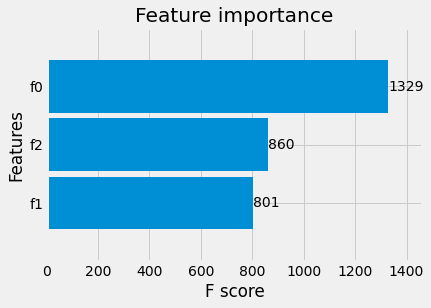

In [ ]:
plot_importance(reg, height=0.9)

In [ ]:
validacion = reg.predict(X_test)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [ ]:
validacion_p

validacion
0   53897.058594
1   54298.015625
2   54298.015625
3   54849.765625
4   54750.722656
5   51324.683594
6   48948.015625
7   47816.128906
8   47646.671875
9   47526.484375
10  47785.359375
11  48554.175781
12  48481.492188
13  48482.621094
14  48099.082031
15  48274.531250
16  48042.519531
17  48723.656250
18  50122.082031
19  50157.882812
20  52141.410156
21  54118.898438
22  55131.625000
23  55064.875000
24  54444.855469
25  51784.968750
26  52303.625000
27  51421.207031
28  49790.750000
29  49795.277344
30  48808.496094
31  47748.875000
32  48291.070312
33  49114.496094
34  49936.441406
35  49936.441406
36  49936.441406
37  49959.917969
38  49959.917969
39  50218.953125
40  50313.378906
41  50361.375000
42  50254.652344
43  50088.957031
44  50491.671875
45  50387.894531
46  50477.472656
47  50272.265625
48  50264.937500
49  49850.953125
50  49337.296875
51  49398.812500
52  49398.812500
53  50338.503906
54  50386.277344
55  51127.605469
56  49818.687500
57  50070.238281
58  50083.218750
59  50239.351562

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

45279157.820388794

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

5861.773684895835

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
num_boost_round = 1000

In [ ]:
reg2 = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[17:58:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-rmse:44405.6
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:34114
[2]	Test-rmse:26801.1
[3]	Test-rmse:21454.2
[4]	Test-rmse:17625.1
[5]	Test-rmse:16447.1
[6]	Test-rmse:14257.7
[7]	Test-rmse:12311.3
[8]	Test-rmse:10747
[9]	Test-rmse:9568.41
[10]	Test-rmse:8815.8
[11]	Test-rmse:8120.1
[12]	Test-rmse:7447.29
[13]	Test-rmse:6903.44
[14]	Test-rmse:6466.63
[15]	Test-rmse:6117.71
[16]	Test-rmse:5840.23
[17]	Test-rmse:5620.25
[18]	Test-rmse:5446.15
[19]	Test-rmse:5308.4
[20]	Test-rmse:5199.31
[21]	Test-rmse:5112.72
[22]	Test-rmse:5043.8
[23]	Test-rmse:4988.74
[24]	Test-rmse:4944.56
[25]	Test-rmse:4908.97
[26]	Test-rmse:4880.15
[27]	Test-rmse:4856.71
[28]	Test-rmse:4837.57
[29]	Test-rmse:4843.33
[30]	Test-rmse:4840.66
[31]	Test-rmse:4825.1
[32]	Test-rmse:4830.22
[33]	Test-rmse:4817.35
[34]	Test-rmse:4820.53
[35]	Test-rmse:4820.52
[36]	Te

In [ ]:
print("Best MAE: {:.2f} with {} rounds".format(
                 reg2.best_score,
                 reg2.best_iteration+1))

Best MAE: 4795.72 with 38 rounds


In [ ]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=3,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

[17:58:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0      4714.688802      86.918702    4722.239258    171.310655
1      3324.512614      61.445364    3338.819987    126.735949
2      2350.408773      42.973987    2363.507243     96.665683
3      1663.541341      30.652893    1681.360433     75.901554
4      1181.285685      21.189043    1203.957519     62.926111
5       843.960246      14.985445     879.651347     54.519738
6       610.221415      11.886945     658.855143     41.786205
7       455.048594       8.920341     523.029439     39.684034
8       355.551127       4.766759     439.087962     35.061960
9       291.082204       2.797856     391.341176     34.634910
10      250.516159       3.116020     364.242696     30.509431
11      223.833735       2.733335     347.950378     26.707213
12      205.685013       2.608179     342.498281     26.443691
13      194.292430       1.454815     338.335866     26.866053
14      185.480530       2.138842     336.802551     25.789229
15      178.600805       1.986881     335.448578     25.117458
16      173.970260       2.630385     335.525269     23.918117
17      170.554754       2.895817     334.204966     23.639429
18      166.561941       3.678699     334.917216     23.703218
19      163.328512       4.434366     333.969279     22.692865
20      160.558716       5.060880     334.161499     22.426252
21      156.793167       5.904489     333.689952     21.391865
22      154.136180       5.546545     333.509928     21.421099
23      150.663020       7.172281     333.054026     20.520394
24      148.631582       7.332284     333.236297     20.316922
25      146.555517       7.684796     333.182770     20.893206
26      144.092357       8.293974     332.681274     20.952567
27      141.171427       9.136985     332.443654     21.558799

In [ ]:
cv_results['test-mae-mean'].min()

332.4436543333333

In [ ]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [ ]:
# Define initial best params and MAE
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))

CV with max_depth=9, min_child_weight=5
CV with max_depth=9, min_child_weight=6
CV with max_depth=9, min_child_weight=7
CV with max_depth=10, min_child_weight=5
CV with max_depth=10, min_child_weight=6
CV with max_depth=10, min_child_weight=7
CV with max_depth=11, min_child_weight=5
CV with max_depth=11, min_child_weight=6
CV with max_depth=11, min_child_weight=7


In [ ]:
# Update our parameters
params['max_depth'] = max_depth
params['min_child_weight'] = min_child_weight

In [ ]:
# Run CV
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)

[17:58:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Update best MAE
mean_mae = cv_results['test-mae-mean'].min()
boost_rounds = cv_results['test-mae-mean'].argmin()
print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
if mean_mae < min_mae:
    min_mae = mean_mae
    best_params = (max_depth,min_child_weight)

	MAE 299.0720582 for 37 rounds


In [ ]:
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

Best params: 11, 7, MAE: 299.0720582


In [ ]:
params['max_depth'] = 11
params['min_child_weight'] = 7

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [ ]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[17:58:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 299.0720582 for 37 rounds
CV with subsample=1.0, colsample=0.9
[17:58:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:58

In [ ]:
params['subsample'] = 1.0
params['colsample_bytree'] = 1.0

In [ ]:
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics={'mae'},early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CV with eta=0.3
[17:58:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 299.0720582 for 37 rounds

CV with eta=0.2
[17:58:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:58:37] WARNING: /workspace/src/objective/re

In [ ]:
params['eta'] = 0.1

In [ ]:
params['eval_metric'] = 'mae'

In [ ]:
params

{'colsample_bytree': 1.0,
 'eta': 0.1,
 'eval_metric': 'mae',
 'max_depth': 11,
 'min_child_weight': 7,
 'objective': 'reg:linear',
 'subsample': 1.0}

In [ ]:
best_model_Users = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=140
)

[17:59:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:51743.6
Will train until Test-mae hasn't improved in 140 rounds.
[1]	Test-mae:48330.6
[2]	Test-mae:44493.3
[3]	Test-mae:41010.3
[4]	Test-mae:37885.6
[5]	Test-mae:35012.4
[6]	Test-mae:32404.5
[7]	Test-mae:30067.1
[8]	Test-mae:27915.6
[9]	Test-mae:26652.2
[10]	Test-mae:24858.6
[11]	Test-mae:23230.6
[12]	Test-mae:21752.8
[13]	Test-mae:20411.5
[14]	Test-mae:19194
[15]	Test-mae:18486.1
[16]	Test-mae:17476.9
[17]	Test-mae:16489.6
[18]	Test-mae:15984.4
[19]	Test-mae:15157.4
[20]	Test-mae:14404.9
[21]	Test-mae:13772.5
[22]	Test-mae:13144.6
[23]	Test-mae:12539.9
[24]	Test-mae:11988.1
[25]	Test-mae:11484.6
[26]	Test-mae:11047.8
[27]	Test-mae:10626.6
[28]	Test-mae:10242.2
[29]	Test-mae:9900.62
[30]	Test-mae:9591.23
[31]	Test-mae:9321.33
[32]	Test-mae:9224.34
[33]	Test-mae:9017.2
[34]	Test-mae:8816.78
[35]	Test-mae:8743.41
[36]	Test-mae:8568.7
[37]	Test-mae:85

In [ ]:
dtrain2 = xgb.DMatrix(X_test)

In [ ]:
validacion = best_model_Users.predict(dtrain2)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

58245695.775678225

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

6765.4041744791675

In [ ]:
y_pru = y_test

In [ ]:
y_pru = y_pru.reset_index()

In [ ]:
y_pru

index     Close
0    1959  55841.19
1    1960  57408.57
2    1961  54087.67
3    1962  48891.00
4    1963  49676.20
5    1964  47073.73
6    1965  46276.87
7    1966  46106.43
8    1967  45135.66
9    1968  49587.03
10   1969  48440.65
11   1970  50349.37
12   1971  48374.09
13   1972  48751.71
14   1973  48882.20
15   1974  50971.75
16   1975  52375.17
17   1976  54884.50
18   1977  55851.59
19   1978  57773.16
20   1979  57221.72
21   1980  61188.39
22   1981  58968.31
23   1982  55605.20
24   1983  56900.75
25   1984  58912.97
26   1985  57648.16
27   1986  58030.01
28   1987  58102.28
29   1988  57351.56
30   1989  54083.25
31   1990  54340.89
32   1991  52303.65
33   1992  51293.78
34   1993  55025.59
35   1994  55817.14
36   1995  55777.63
37   1996  57635.47
38   1997  58746.57
39   1998  58740.55
40   1999  58720.44
41   2000  58950.01
42   2001  57051.94
43   2002  58202.01
44   2003  59129.99
45   2004  57991.15
46   2005  55953.45
47   2006  58077.52
48   2007  58142.54
49   2008  59769.13
50   2009  60002.43
51   2010  59860.00
52   2011  63575.00
53   2012  62959.53
54   2013  63159.98
55   2014  61334.80
56   2015  60006.66
57   2016  56150.01
58   2017  55633.14
59   2018  56566.46

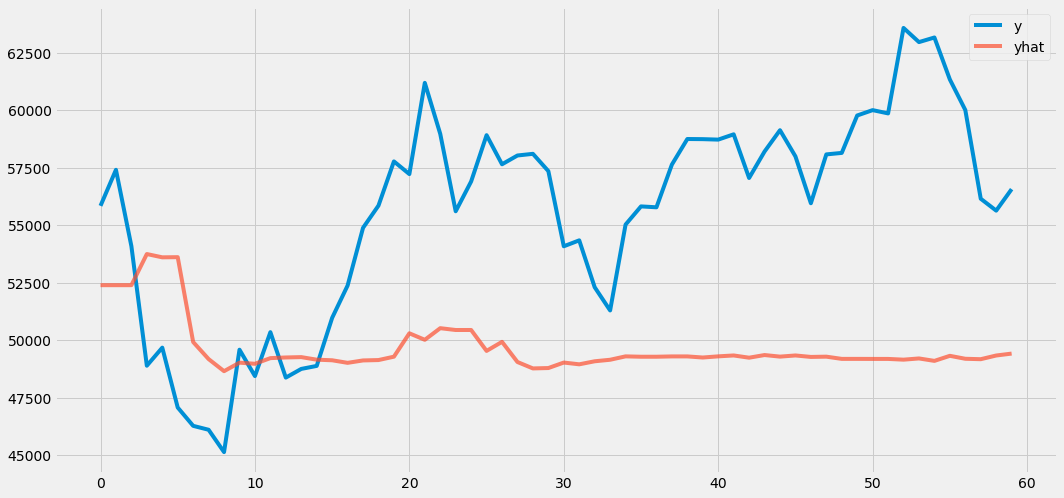

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(y_pru['Close'], label='y')
plt.plot(validacion_p, label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
dtrain2 = xgb.DMatrix(scaled)

In [ ]:
validacion = best_model_Users.predict(dtrain2)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'validacion'})
validacion_p

validacion
0       254.426987
1       254.426987
2       256.322845
3       256.322845
4       258.440582
...            ...
2014  49320.863281
2015  49192.714844
2016  49174.097656
2017  49334.550781
2018  49418.226562

[2019 rows x 1 columns]

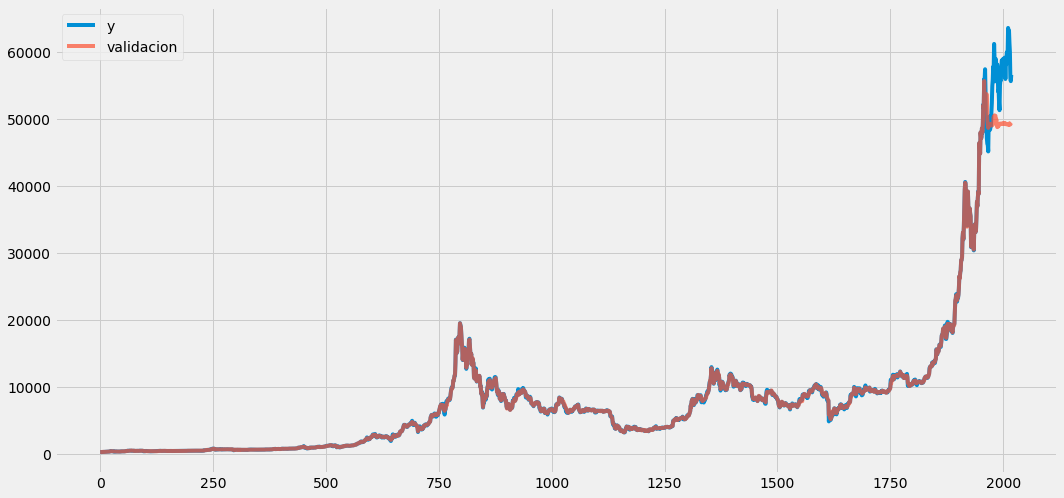

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(df2['Close'], label='y')
plt.plot(validacion_p, label='validacion', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
# use labeled data set
shap_explainer = shap.TreeExplainer(best_model_Users)
test_shap_values = shap_explainer.shap_values(X_test)
print('Expected Value:', shap_explainer.expected_value)
pd.DataFrame(test_shap_values).head()

Expected Value: 6695.2


0            1           2
0  43357.421875  2885.623779 -545.909058
1  43357.421875  2885.623779 -545.909058
2  43357.421875  2885.623779 -545.909058
3  43458.914062  3138.061768  453.740875
4  44180.984375  2345.563232  381.167542

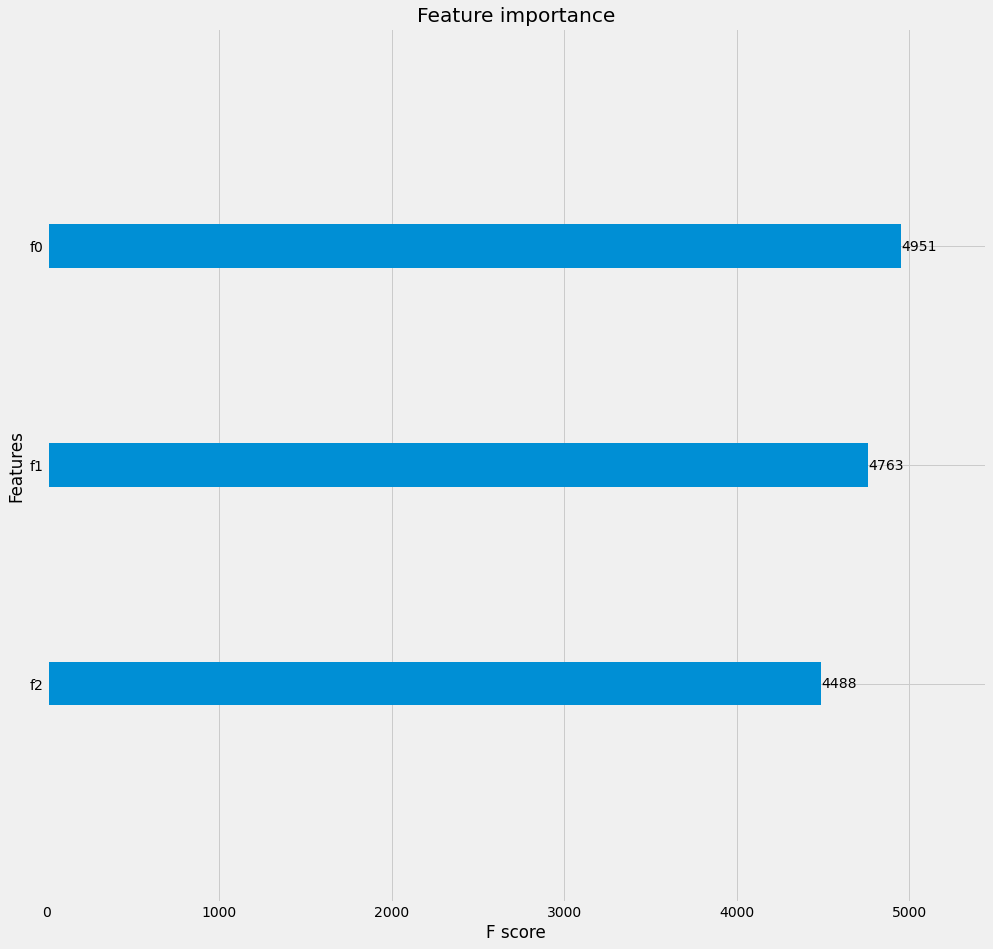

In [ ]:
from xgboost import plot_importance
best_model_Users.feature_names_ = df2.columns.values[1:48]
fig, ax = plt.subplots(1,1,figsize=(15,15))
plot_importance(best_model_Users, ax=ax)
plt.savefig("xgboost_feature_importance.png")

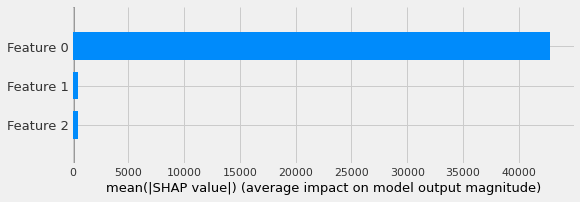

In [ ]:
shap.summary_plot(test_shap_values, X_test, plot_type="bar", max_display=48, show=False)
plt.savefig("shap_feature_importance.png")

IndexError: ignored

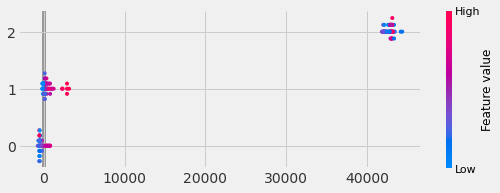

In [ ]:
# shows feature contribution
shap.summary_plot(test_shap_values, X_test, max_display=48, feature_names=pca_df.columns.values[1:48])

In [ ]:
X

In [ ]:
# Visualizar la relación entre variables usando parcelas
plt.figure(figsize = (15, 15))

fig = px.scatter_matrix(X,
    dimensions = X.columns[:8], color = 'EMA_2')

fig.update_layout(
    title = 'Sales Data',
    width = 1100,
    height = 1100,
)
fig.show()

# Los colores segmentan los meses para poder ubicarlos en las graficas en las que no es tan evidente a que mes pertenecen


ValueError: ignored

<Figure size 1080x1080 with 0 Axes>

In [ ]:
list(df2)

## PCA

### MA AND EMA

In [ ]:
df2.shape

(2019, 48)

In [ ]:
df2.corr()

Close    Volume  ...  dayofmonth  weekofyear
Close               1.000000  0.024030  ...   -0.018738   -0.147790
Volume              0.024030  1.000000  ...   -0.004531    0.032172
NumberTransactions  0.842797 -0.164348  ...   -0.008798   -0.113279
Close SP500         0.770841 -0.033776  ...    0.021511   -0.091624
halving             0.662333 -0.227811  ...    0.001258    0.035080
Close Gold          0.567369 -0.149396  ...    0.023114   -0.067810
OpenDJ              0.706746  0.058882  ...    0.020327   -0.085523
CloseDJ             0.703123  0.059330  ...    0.019121   -0.086963
Close_eth           0.920012  0.199310  ...   -0.022059   -0.226384
MA_2                0.998281  0.027661  ...   -0.015667   -0.149544
EMA_2               0.998442  0.027556  ...   -0.015670   -0.149552
MA_3                0.997847  0.028451  ...   -0.014731   -0.150011
EMA_3               0.998142  0.028143  ...   -0.014745   -0.150030
MA_5                0.996879  0.029424  ...   -0.012741   -0.150921
EMA_5               0.997486  0.028897  ...   -0.013145   -0.150915
MA_8                0.995503  0.029970  ...   -0.010159   -0.152209
EMA_8               0.996516  0.029492  ...   -0.011552   -0.152110
MA_9                0.995078  0.030088  ...   -0.009479   -0.152600
EMA_9               0.996206  0.029614  ...   -0.011206   -0.152477
MA_10               0.994667  0.030308  ...   -0.008912   -0.152946
EMA_10              0.995904  0.029713  ...   -0.010931   -0.152827
MA_15               0.992353  0.030529  ...   -0.008080   -0.154651
EMA_15              0.994494  0.030000  ...   -0.010268   -0.154298
Momentum_15         0.489152  0.004489  ...   -0.042561   -0.015093
MA_21               0.990114  0.030118  ...   -0.008772   -0.156890
EMA_21              0.992949  0.030105  ...   -0.010244   -0.155484
Momentum_21         0.581927  0.002710  ...   -0.020751   -0.028858
MA_105              0.956856  0.021156  ...   -0.012117   -0.145457
EMA_105             0.971526  0.020803  ...   -0.011387   -0.150028
Momentum_105        0.910500  0.047375  ...   -0.014870   -0.165156
BollingerB_105      0.474130  0.523141  ...    0.004687   -0.221421
MA_200              0.901126 -0.005887  ...   -0.011052   -0.123962
EMA_200             0.944485  0.001816  ...   -0.011342   -0.134945
Momentum_200        0.925737  0.073994  ...   -0.018701   -0.138845
BollingerB_200      0.543327  0.538102  ...   -0.006677   -0.154738
MA_300              0.843922 -0.037773  ...   -0.009836   -0.108510
EMA_300             0.916749 -0.017118  ...   -0.010833   -0.122240
Momentum_300        0.928337  0.093221  ...   -0.014244   -0.182116
BollingerB_300      0.504838  0.575716  ...   -0.007035   -0.057820
PIB                 0.254533  0.176998  ...   -0.009012    0.040186
CPI                 0.288188 -0.005644  ...   -0.020413   -0.541434
dayofweek          -0.000611 -0.070161  ...    0.001450    0.001523
quarter            -0.159570  0.025085  ...    0.022157    0.948365
month              -0.153130  0.036805  ...    0.020325    0.970826
year                0.669980 -0.061620  ...   -0.024294   -0.206025
dayofyear          -0.154110  0.035363  ...    0.100773    0.972117
dayofmonth         -0.018738 -0.004531  ...    1.000000    0.073791
weekofyear         -0.147790  0.032172  ...    0.073791    1.000000

[48 rows x 48 columns]

In [ ]:
columns_to_pca = []
for i in df2.columns.values:
  if i.startswith("MA_") or i.startswith("EMA_"):
    columns_to_pca.append(np.where(df2.columns.values == i)[0][0])

In [ ]:
columns_to_pca

[9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 24,
 25,
 27,
 28,
 31,
 32,
 35,
 36]

In [ ]:
df2_to_pca = df2.iloc[:, columns_to_pca]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
df2_to_pca.head()

MA_2       EMA_2        MA_3       EMA_3  ...  MA_200  EMA_200  MA_300  EMA_300
0    0.00    0.000000    0.000000    0.000000  ...     0.0      0.0     0.0      0.0
1    0.00    0.000000    0.000000    0.000000  ...     0.0      0.0     0.0      0.0
2  248.55  248.075000    0.000000    0.000000  ...     0.0      0.0     0.0      0.0
3  248.80  249.407692  249.033333  249.242857  ...     0.0      0.0     0.0      0.0
4  251.50  251.832500  250.200000  251.246667  ...     0.0      0.0     0.0      0.0

[5 rows x 22 columns]

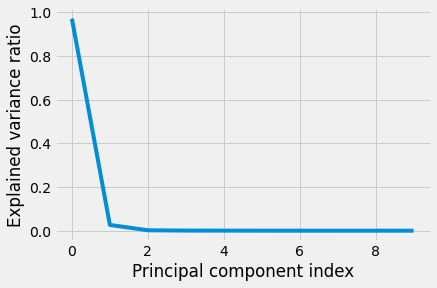

In [ ]:
# Piepleine con Scaler y n_components=10
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=10))])

# Ajuste pipeline a los datos
pipe.fit(df2_to_pca)


# Plot the explained variance ratio
plt.plot(pipe.steps[1][1].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

[0.97058614]


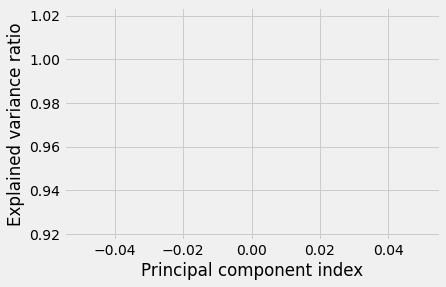

In [ ]:
# Piepleine con Scaler y n_components=10
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=1))])

# Ajuste pipeline a los datos
pipe.fit(df2_to_pca)


# Plot the explained variance ratio
print(pipe.steps[1][1].explained_variance_ratio_.cumsum())

plt.plot(pipe.steps[1][1].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

In [ ]:
pca_values = pipe.transform(df2_to_pca)

In [ ]:
df2["MA_EMA_PCA"] = pca_values

In [ ]:
df2.corr()

Close    Volume  ...  weekofyear  MA_EMA_PCA
Close               1.000000  0.024030  ...   -0.147790    0.991040
Volume              0.024030  1.000000  ...    0.032172    0.021328
NumberTransactions  0.842797 -0.164348  ...   -0.113279    0.818725
Close SP500         0.770841 -0.033776  ...   -0.091624    0.803871
halving             0.662333 -0.227811  ...    0.035080    0.660930
Close Gold          0.567369 -0.149396  ...   -0.067810    0.593574
OpenDJ              0.706746  0.058882  ...   -0.085523    0.749951
CloseDJ             0.703123  0.059330  ...   -0.086963    0.746227
Close_eth           0.920012  0.199310  ...   -0.226384    0.916821
MA_2                0.998281  0.027661  ...   -0.149544    0.993231
EMA_2               0.998442  0.027556  ...   -0.149552    0.993313
MA_3                0.997847  0.028451  ...   -0.150011    0.993825
EMA_3               0.998142  0.028143  ...   -0.150030    0.993941
MA_5                0.996879  0.029424  ...   -0.150921    0.994658
EMA_5               0.997486  0.028897  ...   -0.150915    0.994850
MA_8                0.995503  0.029970  ...   -0.152209    0.995402
EMA_8               0.996516  0.029492  ...   -0.152110    0.995742
MA_9                0.995078  0.030088  ...   -0.152600    0.995563
EMA_9               0.996206  0.029614  ...   -0.152477    0.995961
MA_10               0.994667  0.030308  ...   -0.152946    0.995692
EMA_10              0.995904  0.029713  ...   -0.152827    0.996152
MA_15               0.992353  0.030529  ...   -0.154651    0.995952
EMA_15              0.994494  0.030000  ...   -0.154298    0.996816
Momentum_15         0.489152  0.004489  ...   -0.015093    0.416579
MA_21               0.990114  0.030118  ...   -0.156890    0.995799
EMA_21              0.992949  0.030105  ...   -0.155484    0.997239
Momentum_21         0.581927  0.002710  ...   -0.028858    0.515337
MA_105              0.956856  0.021156  ...   -0.145457    0.982877
EMA_105             0.971526  0.020803  ...   -0.150028    0.992543
Momentum_105        0.910500  0.047375  ...   -0.165156    0.864805
BollingerB_105      0.474130  0.523141  ...   -0.221421    0.451302
MA_200              0.901126 -0.005887  ...   -0.123962    0.943077
EMA_200             0.944485  0.001816  ...   -0.134945    0.976265
Momentum_200        0.925737  0.073994  ...   -0.138845    0.891671
BollingerB_200      0.543327  0.538102  ...   -0.154738    0.534431
MA_300              0.843922 -0.037773  ...   -0.108510    0.893682
EMA_300             0.916749 -0.017118  ...   -0.122240    0.954934
Momentum_300        0.928337  0.093221  ...   -0.182116    0.900285
BollingerB_300      0.504838  0.575716  ...   -0.057820    0.510168
PIB                 0.254533  0.176998  ...    0.040186    0.298014
CPI                 0.288188 -0.005644  ...   -0.541434    0.278699
dayofweek          -0.000611 -0.070161  ...    0.001523   -0.000869
quarter            -0.159570  0.025085  ...    0.948365   -0.158742
month              -0.153130  0.036805  ...    0.970826   -0.152349
year                0.669980 -0.061620  ...   -0.206025    0.716511
dayofyear          -0.154110  0.035363  ...    0.972117   -0.152865
dayofmonth         -0.018738 -0.004531  ...    0.073791   -0.011672
weekofyear         -0.147790  0.032172  ...    1.000000   -0.148934
MA_EMA_PCA          0.991040  0.021328  ...   -0.148934    1.000000

[49 rows x 49 columns]

In [ ]:
df2.to_csv("df_with_emama_pca.csv")

### MOMEMTUM

In [ ]:
columns_to_pca = []
for i in df2.columns.values:
  if i.startswith("Momentum_"):
    columns_to_pca.append(np.where(df2.columns.values == i)[0][0])

In [ ]:
df2_to_pca = df2.iloc[:, columns_to_pca]

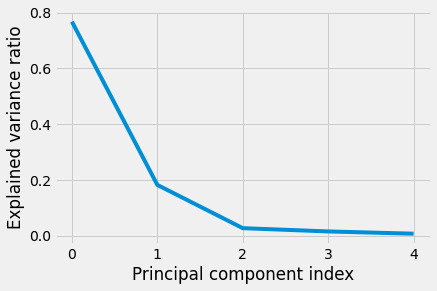

In [ ]:
# Piepleine con Scaler y n_components=10
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=5))])

# Ajuste pipeline a los datos
pipe.fit(df2_to_pca)


# Plot the explained variance ratio
plt.plot(pipe.steps[1][1].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

[0.76780627]


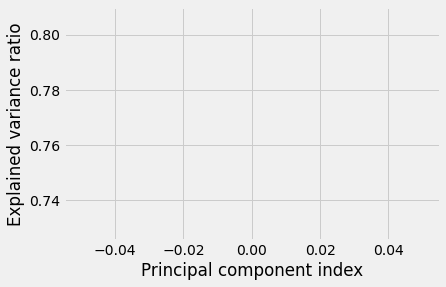

In [ ]:
# Piepleine con Scaler y n_components=10
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=1))])

# Ajuste pipeline a los datos
pipe.fit(df2_to_pca)


# Plot the explained variance ratio
print(pipe.steps[1][1].explained_variance_ratio_.cumsum())

plt.plot(pipe.steps[1][1].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

In [ ]:
pca_values = pipe.transform(df2_to_pca)

In [ ]:
df2["Momentum_PCA"] = pca_values

### Bollinger

In [ ]:
columns_to_pca = []
for i in df2.columns.values:
  if i.startswith("Bollinger"):
    columns_to_pca.append(np.where(df2.columns.values == i)[0][0])

In [ ]:
df2_to_pca = df2.iloc[:, columns_to_pca]

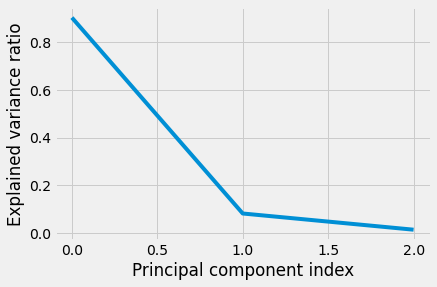

In [ ]:
# Piepleine con Scaler y n_components=10
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=3))])

# Ajuste pipeline a los datos
pipe.fit(df2_to_pca)


# Plot the explained variance ratio
plt.plot(pipe.steps[1][1].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

[0.90236204]


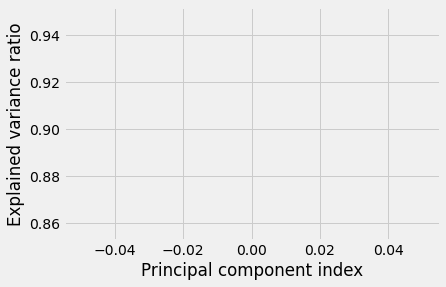

In [ ]:
# Piepleine con Scaler y n_components=10
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=1))])

# Ajuste pipeline a los datos
pipe.fit(df2_to_pca)


# Plot the explained variance ratio
print(pipe.steps[1][1].explained_variance_ratio_.cumsum())

plt.plot(pipe.steps[1][1].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

In [ ]:
pca_values = pipe.transform(df2_to_pca)

In [ ]:
df2["Bollinger_PCA"] = pca_values

In [ ]:
df2.corr()

Close    Volume  ...  Momentum_PCA  Bollinger_PCA
Close               1.000000  0.024030  ...      0.889956       0.534801
Volume              0.024030  1.000000  ...      0.053204       0.574346
NumberTransactions  0.842797 -0.164348  ...      0.808019       0.306947
Close SP500         0.770841 -0.033776  ...      0.562407       0.393777
halving             0.662333 -0.227811  ...      0.560424       0.105279
Close Gold          0.567369 -0.149396  ...      0.403247       0.150469
OpenDJ              0.706746  0.058882  ...      0.477982       0.464058
CloseDJ             0.703123  0.059330  ...      0.475444       0.463345
Close_eth           0.920012  0.199310  ...      0.807215       0.689625
MA_2                0.998281  0.027661  ...      0.889384       0.536252
EMA_2               0.998442  0.027556  ...      0.889547       0.536323
MA_3                0.997847  0.028451  ...      0.886778       0.536709
EMA_3               0.998142  0.028143  ...      0.887039       0.536854
MA_5                0.996879  0.029424  ...      0.881380       0.537611
EMA_5               0.997486  0.028897  ...      0.881930       0.537787
MA_8                0.995503  0.029970  ...      0.873293       0.538898
EMA_8               0.996516  0.029492  ...      0.874346       0.538848
MA_9                0.995078  0.030088  ...      0.870613       0.539263
EMA_9               0.996206  0.029614  ...      0.871922       0.539113
MA_10               0.994667  0.030308  ...      0.867897       0.539587
EMA_10              0.995904  0.029713  ...      0.869577       0.539337
MA_15               0.992353  0.030529  ...      0.853391       0.540582
EMA_15              0.994494  0.030000  ...      0.859152       0.539952
Momentum_15         0.489152  0.004489  ...      0.755122       0.207873
MA_21               0.990114  0.030118  ...      0.838120       0.540710
EMA_21              0.992949  0.030105  ...      0.849159       0.539899
Momentum_21         0.581927  0.002710  ...      0.826265       0.272397
MA_105              0.956856  0.021156  ...      0.746973       0.508705
EMA_105             0.971526  0.020803  ...      0.773960       0.516238
Momentum_105        0.910500  0.047375  ...      0.942821       0.522811
BollingerB_105      0.474130  0.523141  ...      0.487736       0.917982
MA_200              0.901126 -0.005887  ...      0.647844       0.441762
EMA_200             0.944485  0.001816  ...      0.715297       0.478559
Momentum_200        0.925737  0.073994  ...      0.925294       0.572949
BollingerB_200      0.543327  0.538102  ...      0.512124       0.982666
MA_300              0.843922 -0.037773  ...      0.566817       0.368490
EMA_300             0.916749 -0.017118  ...      0.668998       0.442722
Momentum_300        0.928337  0.093221  ...      0.917075       0.583960
BollingerB_300      0.504838  0.575716  ...      0.440344       0.948031
PIB                 0.254533  0.176998  ...      0.086759       0.345881
CPI                 0.288188 -0.005644  ...      0.278961       0.249897
dayofweek          -0.000611 -0.070161  ...      0.002331       0.000419
quarter            -0.159570  0.025085  ...     -0.139305      -0.153658
month              -0.153130  0.036805  ...     -0.136290      -0.145463
year                0.669980 -0.061620  ...      0.422043       0.326222
dayofyear          -0.154110  0.035363  ...     -0.137415      -0.146525
dayofmonth         -0.018738 -0.004531  ...     -0.024400      -0.003298
weekofyear         -0.147790  0.032172  ...     -0.126709      -0.151503
MA_EMA_PCA          0.991040  0.021328  ...      0.835215       0.525698
Momentum_PCA        0.889956  0.053204  ...      1.000000       0.505503
Bollinger_PCA       0.534801  0.574346  ...      0.505503       1.000000

[51 rows x 51 columns]

In [ ]:
df2.to_csv("df_with_pca.csv")

## XGBoost With PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/Dataproject 3/"

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import xgboost as xgb
from xgboost import plot_importance

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv(path + "dataset_final.csv", index_col=0)
df.head()

Close    Volume  NumberTransactions  ...  Momentum_PCA  Bollinger_PCA  tipoint
0  247.60   9493.89              134410  ...     -0.672592      -2.648255     0.75
1  250.00  12875.40              134878  ...     -0.672592      -2.648255     0.75
2  253.00  30115.77              141985  ...     -0.672592      -2.648255     0.75
3  255.26  50535.45              153495  ...     -0.672592      -2.648255     0.75
4  263.75  26743.35              143286  ...     -0.672592      -2.648255     0.75

[5 rows x 50 columns]

In [ ]:
columns = ["Close", "Close SP500", "Volume", "NumberTransactions", "Close_eth", "MA_EMA_PCA", "Momentum_PCA", "Bollinger_PCA"]

In [ ]:
columns = df.columns.values.tolist()

In [ ]:
df_sm = df[columns]

In [ ]:
dayofweek = pd.get_dummies(df.dayofweek)
df_sm = pd.concat([df_sm, dayofweek], axis=1)

In [ ]:
columns = columns + dayofweek.columns.values.tolist()

In [ ]:
df_sm = df_sm.drop(0)

In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_sm)
scaled = pd.DataFrame(scaled, columns=columns)

In [ ]:
scaled_X = scaled.iloc[:-5].reset_index()
scaled_y = scaled.Close[5:].reset_index()

In [ ]:
#One day and 5 days -> 1959
#30 days -> 1800
X_train = scaled_X.drop(["Close", "index"], axis=1)[:1800]
y_train = scaled_y.Close[:1800]
X_test = scaled_X.drop(["Close", "index"], axis=1)[1800:]
y_test = scaled_y.Close[1800:]

In [ ]:
X_train = scaled.drop("Close", axis=1)[:1959]
y_train = scaled.Close[:1959]
X_test = scaled.drop("Close", axis=1)[1959:]
y_test = scaled.Close[1959:]

In [ ]:
print("Train: X shape: {} , y shape: {}".format(X_train.shape, y_train.shape))
print("Test: X shape: {} , y shape: {}".format(X_test.shape, y_test.shape))

Train: X shape: (1959, 49) , y shape: (1959,)
Test: X shape: (59, 49) , y shape: (59,)


In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

[18:45:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

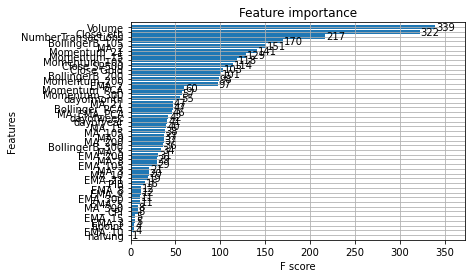

In [ ]:
plot_importance(reg, height=0.9)

In [ ]:
validacion = reg.predict(X_test)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'Close'})
validacion_p.head()

Close
0  0.864266
1  0.828079
2  0.702441
3  0.661656
4  0.615065

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, validacion_p)
mse

0.016164346160286

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, validacion_p)

0.1202139878149583

In [ ]:
preds = scaler.inverse_transform(pd.concat([validacion_p, X_test.reset_index().drop("index", axis=1)], axis=1))
orgs = scaler.inverse_transform(pd.concat([y_test, X_test], axis=1))

In [ ]:
mean_squared_error(orgs[:,0], preds[:,0])

64824840.652267575

In [ ]:
mean_absolute_error(orgs[:,0], preds[:,0])

7612.839291952993

In [ ]:
validacion = reg.predict(X_test)

In [ ]:
validacion_p = pd.DataFrame(validacion, columns={'Close'})
validacion_p.head()

Close
0  0.864266
1  0.828079
2  0.702441
3  0.661656
4  0.615065

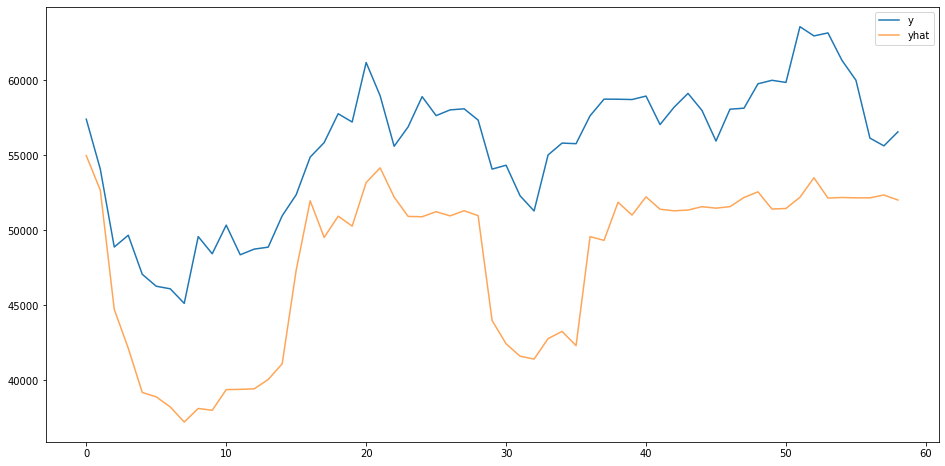

In [ ]:
plt.figure(figsize=(16,8))
#plt.plot(todo1, label='modelo1')

plt.plot(orgs[:,0], label='y')
plt.plot(preds[:,0], label='yhat', alpha=0.7)
#plt.plot(todo1, label='modelo1')
#plt.plot(todo2, label='modelo2')

plt.legend(loc='best')
plt.show()

In [ ]:
err = 0
for i in range(0, len(orgs[:,0])-1):
    if orgs[i, 0] > orgs[i+1, 0]: #Baja
      if preds[i, 0] < preds[i+1, 0]:
        err+=1
    else: #Sube
      if preds[i, 0] >= preds[i+1, 0]:
        err+=1

In [ ]:
err

20

In [ ]:
1 - (err/len(orgs[:,0]))

0.6610169491525424

In [ ]:
reg.save_model("xgboost_1day_no_dummy")

## LSTM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM, LeakyReLU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# ligeramente modificada para escoger la variable objetivo
def create_dataset(dataset, look_back_memory=1, idx_target=0):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back_memory-1):
      X = dataset.drop(dataset.columns.values[idx_target], axis=1)
      dataX.append(X.iloc[[i]])
      dataY.append(dataset.loc[i+look_back_memory, dataset.columns.values[idx_target]])
    return np.array(dataX), np.array(dataY)

In [ ]:
df = pd.read_csv(path + "dataset_final.csv", index_col=0)

In [ ]:
columns = ["Close", "Close SP500", "Volume", "NumberTransactions", "Close_eth", "MA_EMA_PCA", "Momentum_PCA", "Bollinger_PCA"]
columns = df.columns.values.tolist()
df_sm = df[columns]

In [ ]:
df_sm.values[0,0]

247.6

In [ ]:
np.random.seed(42)

# cargamos los datos
dataset = df_sm.values
dataset = dataset.astype('float32')

# normalizamos el dataset
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

# dividimos en train y test
# train_size = int(len(dataset) * 0.67)
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

train_df = pd.DataFrame(train, columns=df_sm.columns.values)
test_df = pd.DataFrame(test, columns=df_sm.columns.values)


# transformamos los datos para crearnos N registros con T timestamps cada uno 
# (uno por cada instante temporal hasta completar el tamaño de la ventana) y 
# las V variables de las que disponga nuestro dataset. En este caso, vamos a 
# escoger una ventana con un único timestamp T=10 y solo tendremos una variable,
# con lo que V=1 (valor de cierre de la acción).
look_back_memory = 1
trainX, trainY = create_dataset(train_df, look_back_memory, 0)
testX, testY = create_dataset(test_df, look_back_memory, 0)
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(1350, 1, 49) (1350,)
(664, 1, 49) (664,)


In [ ]:
variables = 49
trainX = np.reshape(trainX, (trainX.shape[0], look_back_memory, variables))
testX = np.reshape(testX, (testX.shape[0], look_back_memory, variables))
print(trainX.shape)
print(testX.shape)

(1350, 1, 49)
(664, 1, 49)


In [ ]:
model = Sequential() #initialize model
model.add(LSTM(49, input_shape=(look_back_memory, variables)))
model.add(Dense(1, activation=LeakyReLU(alpha=0.01)))
model.compile(loss='mean_absolute_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=1)

Epoch 1/10
1350/1350 [==============================] - 4s 2ms/step - loss: 0.0184
Epoch 2/10
1350/1350 [==============================] - 3s 2ms/step - loss: 0.0086
Epoch 3/10
1350/1350 [==============================] - 3s 2ms/step - loss: 0.0069
Epoch 4/10
1350/1350 [==============================] - 3s 2ms/step - loss: 0.0071
Epoch 5/10
1350/1350 [==============================] - 3s 2ms/step - loss: 0.0065
Epoch 6/10
1350/1350 [==============================] - 3s 2ms/step - loss: 0.0062
Epoch 7/10
1350/1350 [==============================] - 3s 2ms/step - loss: 0.0054
Epoch 8/10
1350/1350 [==============================] - 3s 2ms/step - loss: 0.0053
Epoch 9/10
1350/1350 [==============================] - 2s 2ms/step - loss: 0.0051
Epoch 10/10
1350/1350 [==============================] - 2s 2ms/step - loss: 0.0053


KeyError: ignored

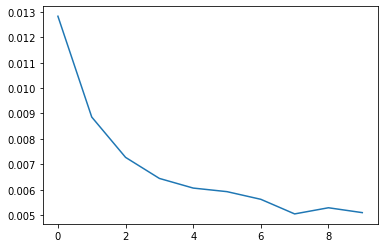

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('LSTM_600000.SH', fontsize='12')
plt.ylabel('loss', fontsize='10')
plt.xlabel('epoch', fontsize='10')
plt.legend()
plt.show()

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
xmin = scaler.data_min_[-2]
xmax = scaler.data_max_[-2]
trainPredict = trainPredict * (xmax - xmin) + xmin
trainY_orig = trainY * (xmax - xmin) + xmin
testPredict = testPredict * (xmax - xmin) + xmin
testY_orig = testY * (xmax - xmin) + xmin

In [ ]:
mean_absolute_error(testPredict, testY_orig)

0.46652567

Train Score: 0.06 RMSE
Test Score: 1.04 RMSE


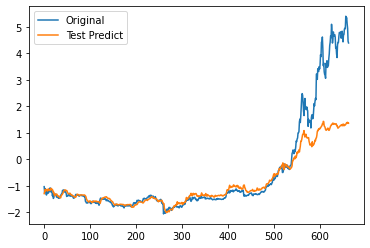

In [ ]:
trainScore = math.sqrt(mean_squared_error(trainY_orig, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY_orig, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# por como creamos el dataset de entrenamiento, ahora tenemos que desplazar
# nuestras predicciones para que "cuadren" con el eje x de los datos originales
trainPredictPlot = np.full(dataset.shape[0], np.nan)
trainPredictPlot[look_back_memory:len(trainPredict)+look_back_memory] = trainPredict[:, 0]

# y lo mismo para el test
testPredictPlot = np.full(dataset.shape[0], np.nan)
testPredictPlot[len(trainPredict)+(look_back_memory*2)+1:len(dataset)-1] = testPredict[:, 0]

# y mostramos los datos originales, la predicción en training y la predicción en test
plt.plot(testY_orig, label='Original')
#plt.plot(trainPredictPlot, label='Train Predict')
plt.plot(testPredict, label='Test Predict')
plt.legend()
plt.show()

In [ ]:
err = 0
for i in range(0, len(testY_orig)-look_back_memory):
    if testY_orig[i] > testY_orig[i+look_back_memory]:#Baja
      if testPredict[i] > testY_orig[i+look_back_memory]:
        err+=1
    else:#Sube
      if testPredict[i] < testY_orig[i+look_back_memory]:
        err+=1

In [ ]:
1-(err/len(testY_orig))

0.43524096385542166

# Predict class

In [ ]:
df["class"] = 0
for i, v in df.iterrows():
  if i < df.shape[0] - 1:
      if v.Close > df.loc[i+1, "Close"]:
        df.loc[i, "class"] = -1
      elif v.Close < df.loc[i+1, "Close"]:
        df.loc[i, "class"] = 1

In [ ]:
df.head()

Close    Volume  NumberTransactions  ...  Momentum_PCA  Bollinger_PCA  class
0  249.50   3021.12              104550  ...     -0.672592      -2.648255     -1
1  247.60   9493.89              134410  ...     -0.672592      -2.648255      1
2  250.00  12875.40              134878  ...     -0.672592      -2.648255      1
3  253.00  30115.77              141985  ...     -0.672592      -2.648255      1
4  255.26  50535.45              153495  ...     -0.672592      -2.648255      1

[5 rows x 52 columns]

## SVC

In [ ]:
columns = ["Close", "Volume", "Close SP500", "Close_eth", "MA_EMA_PCA", "Momentum_PCA", "Bollinger_PCA", "class"]

In [ ]:
X = df

In [ ]:
X_train = X.drop("class", axis=1)[:1959]
y_train = df["class"][:1959]
X_test = X.drop("class", axis=1)[1959:]
y_test = df["class"][1959:]

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(C=0.001, class_weight="balanced"))
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='scale',
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
clf.score(X_train,y_train)

0.5569167942827974

In [ ]:
clf.score(X_test,y_test)

0.5166666666666667

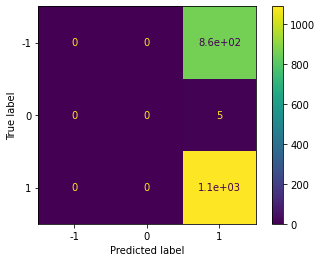

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_train, y_train)

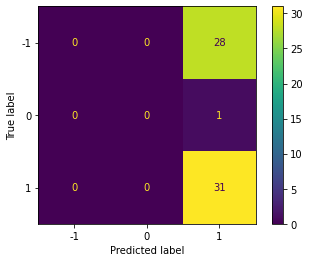

In [ ]:
plot_confusion_matrix(clf, X_test, y_test)